In [61]:
import pandas as pd
import gc
import requests
import os
import sys
import json


In [62]:
embed_human = pd.read_csv("../data/spose/embeddings_human_out.csv")


In [63]:
model_props = pd.read_csv("../data/model_properties/model_attributes_updated_v4.csv")

In [64]:
import os
import pandas as pd

# Folder path
folder_path = "../embed_proc_embed"

# Dictionary to hold DataFrames
embeddings_set = {}

# Loop through all files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        # Read CSV into a DataFrame
        df = pd.read_csv(file_path)
        # Use filename without extension as the key
        key = os.path.splitext(file)[0]
        embeddings_set[key] = df

# embeddings_set is now {filename_without_csv: DataFrame, ...}


In [65]:
embeddings_set

{'model_triplet_output_flan-t5-large_THINGS_embedding':               item   id     dim_0     dim_1     dim_2     dim_3     dim_4  \
 0           airbag    0  0.001855  0.036720 -0.068264 -0.107633  0.106385   
 1            album    1 -0.039189 -0.029274  0.072603 -0.141934  0.033133   
 2        appetizer    2 -0.081684  0.166768  0.145613 -0.057403 -0.005655   
 3       applesauce    3 -0.165377  0.063956  0.037388 -0.243653  0.181535   
 4    backscratcher    4  0.010812 -0.016572 -0.011989 -0.011228  0.002536   
 ..             ...  ...       ...       ...       ...       ...       ...   
 123           veil  123 -0.014974  0.152814  0.003785 -0.093355  0.083664   
 124          visor  124  0.005677  0.002265 -0.006083 -0.003961 -0.004067   
 125     volleyball  125 -0.026748  0.016014 -0.010099 -0.011273  0.055252   
 126         waffle  126 -0.058951  0.104078  0.113198  0.034025 -0.044215   
 127           wrap  127 -0.029862  0.033067  0.130560 -0.121181 -0.005076   
 
       

In [66]:
folder_path = "../embed_proc"

# Dictionary to hold DataFrames
raw_df_set = {}

# Loop through all files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        key = os.path.splitext(file)[0]  # filename without extension
        raw_df_set[key] = df

In [67]:
raw_df_set

{'model_triplet_output_flan-t5-large_THINGS':              head           winner      loser   raw_generation
 0       margarita          dessert      banjo          dessert
 1      quesadilla         carriage  treadmill         carriage
 2            wrap        milkshake    cupcake        milkshake
 3           chaps      tennis ball  taillight      tennis ball
 4      grapefruit            visor      snake            visor
 ...           ...              ...        ...              ...
 34995       jeans          giraffe   bracelet          giraffe
 34996     dessert           blower       beer           blower
 34997   taillight             veil   bathrobe             veil
 34998     pinball     toilet paper   bassinet     toilet paper
 34999         owl  computer screen     flower  computer screen
 
 [35000 rows x 4 columns],
 'model_triplet_output_gemma-2-2b_THINGS':             head         winner       loser  \
 0          doily         hummus       hyena   
 1        hatchet   

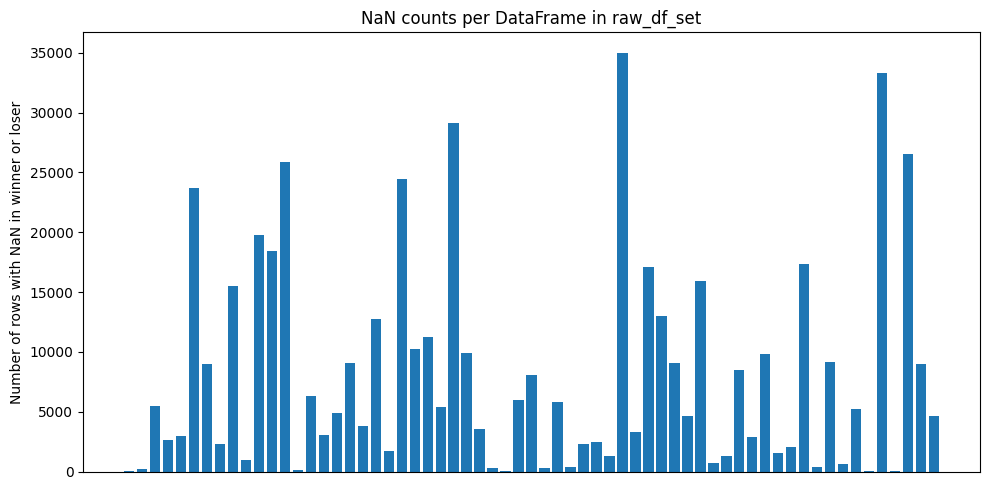

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Collect counts of NaN rows for each DataFrame
nan_counts = {}
for key, df in raw_df_set.items():
    count = df[df["winner"].isna() | df["loser"].isna()].shape[0]
    nan_counts[key] = count

# Make a bar plot without x-axis labels
plt.figure(figsize=(10, 5))
plt.bar(nan_counts.keys(), nan_counts.values())
plt.xticks([], [])  # remove x-axis ticks and labels
plt.ylabel("Number of rows with NaN in winner or loser")
plt.title("NaN counts per DataFrame in raw_df_set")
plt.tight_layout()
plt.show()


In [69]:
nan_counts = {}
for key, df in raw_df_set.items():
    count = df[df["winner"].isna() | df["loser"].isna()].shape[0]
    nan_counts[key] = count

# Print only those above threshold
for key, count in nan_counts.items():
    if count > 15000:
        print(f"{key}: {count}")

# Find keys where more than half the rows are NaN in winner/loser
drop_keys = []
for key, df in raw_df_set.items():
    total_rows = len(df)
    nan_rows = df[df["winner"].isna() | df["loser"].isna()].shape[0]
    if total_rows > 0 and nan_rows > total_rows / 2:
        drop_keys.append(key)

print("Dropping these keys:", drop_keys)

# Drop from both dicts if present
for key in drop_keys:
    raw_df_set.pop(key, None)
    embeddings_set.pop(key, None)


model_triplet_output_gemma-2-27b_THINGS: 23725
model_triplet_output_gemma-3-4b-pt_THINGS: 15521
model_triplet_output_gemma-3-12b-pt_THINGS: 19762
model_triplet_output_gemma-3-27b-pt_THINGS: 18442
model_triplet_output_gemma-3-270m_THINGS: 25874
model_triplet_output_phi-4-mini-reasoning_THINGS: 24417
model_triplet_output_qwen2-7b-instruct_THINGS: 29091
model_triplet_output_gpt-j-6b_THINGS: 34952
model_triplet_output_Instella-3B_THINGS: 17100
model_triplet_output_OLMo-2-0325-32B-Instruct_THINGS: 15942
model_triplet_output_orca-2-13b_THINGS: 17322
model_triplet_output_Yi-9B_THINGS: 33260
model_triplet_output_mamba-1.4b-hf_THINGS: 26572
Dropping these keys: ['model_triplet_output_gemma-2-27b_THINGS', 'model_triplet_output_gemma-3-12b-pt_THINGS', 'model_triplet_output_gemma-3-27b-pt_THINGS', 'model_triplet_output_gemma-3-270m_THINGS', 'model_triplet_output_phi-4-mini-reasoning_THINGS', 'model_triplet_output_qwen2-7b-instruct_THINGS', 'model_triplet_output_gpt-j-6b_THINGS', 'model_triplet_out

In [70]:
embeddings_set

{'model_triplet_output_flan-t5-large_THINGS_embedding':               item   id     dim_0     dim_1     dim_2     dim_3     dim_4  \
 0           airbag    0  0.001855  0.036720 -0.068264 -0.107633  0.106385   
 1            album    1 -0.039189 -0.029274  0.072603 -0.141934  0.033133   
 2        appetizer    2 -0.081684  0.166768  0.145613 -0.057403 -0.005655   
 3       applesauce    3 -0.165377  0.063956  0.037388 -0.243653  0.181535   
 4    backscratcher    4  0.010812 -0.016572 -0.011989 -0.011228  0.002536   
 ..             ...  ...       ...       ...       ...       ...       ...   
 123           veil  123 -0.014974  0.152814  0.003785 -0.093355  0.083664   
 124          visor  124  0.005677  0.002265 -0.006083 -0.003961 -0.004067   
 125     volleyball  125 -0.026748  0.016014 -0.010099 -0.011273  0.055252   
 126         waffle  126 -0.058951  0.104078  0.113198  0.034025 -0.044215   
 127           wrap  127 -0.029862  0.033067  0.130560 -0.121181 -0.005076   
 
       

Using embeddings from: model_triplet_output_gemma-3-27b-it_THINGS_embedding
Embedding shape: (128, 30)


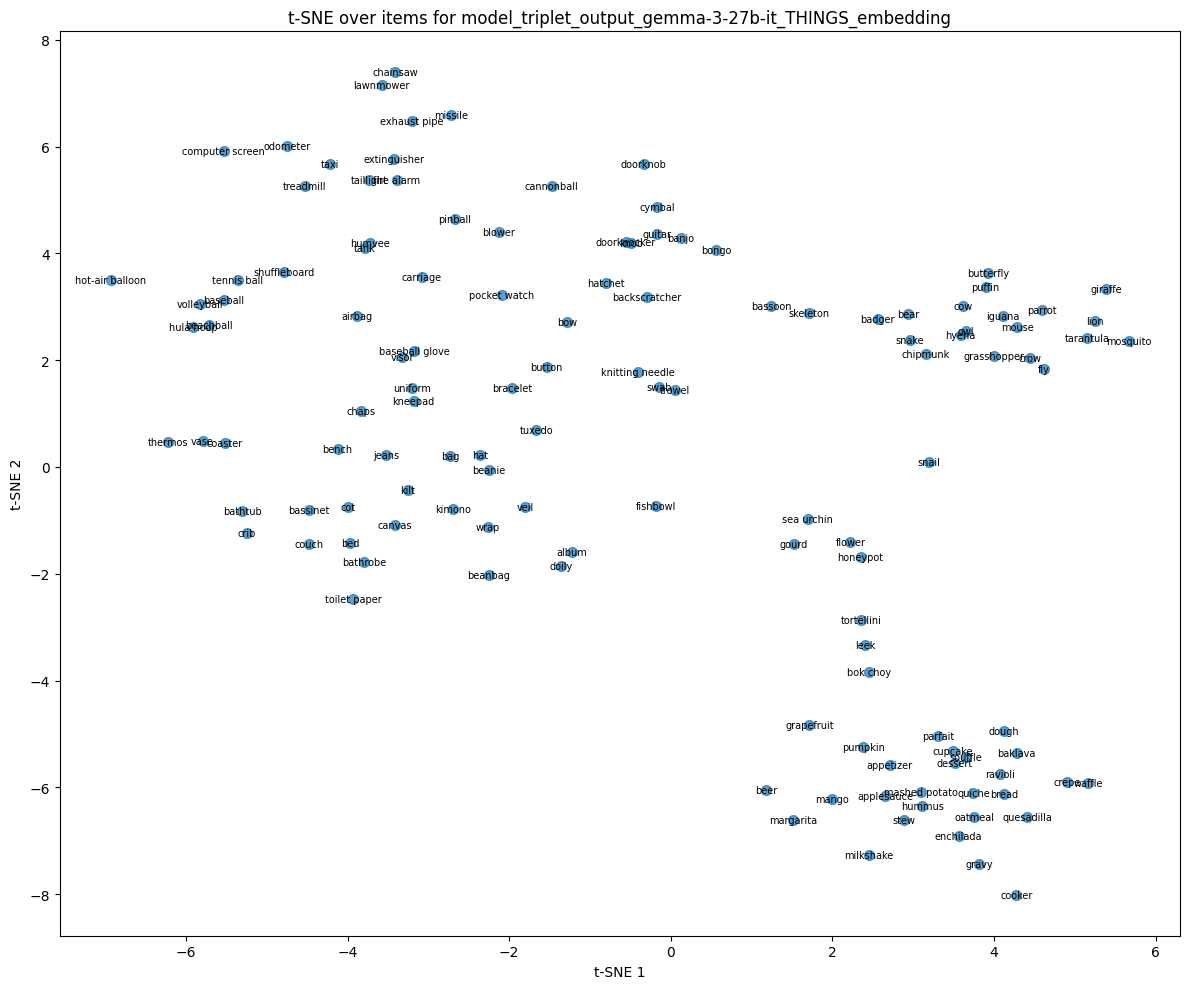

In [71]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Find the matching key
key = [k for k in embeddings_set.keys() if "gemma-3-27b-it" in k]
if not key:
    raise ValueError("No key containing 'gemma-3-27b-it' found")
key = key[0]
print(f"Using embeddings from: {key}")

# 2. Get the DataFrame
df_model = embeddings_set[key]

# 3. Extract only the embedding columns
dims = _dim_cols(df_model)
X = df_model[dims].to_numpy()

# Keep finite rows
mask = np.isfinite(X).all(axis=1)
X = X[mask]
items = df_model.loc[mask, "item"].tolist()

print(f"Embedding shape: {X.shape}")

# 4. Run t-SNE
tsne = TSNE(n_components=2, metric="euclidean", perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X)

# 5. Plot
plt.figure(figsize=(12, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=50, alpha=0.7)

# Add item labels
for i, label in enumerate(items):
    plt.text(X_embedded[i, 0], X_embedded[i, 1], label, fontsize=7, ha="center", va="center")

plt.title(f"t-SNE over items for {key}")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()


In [72]:
for k in embeddings_set.keys():
    print(k)


model_triplet_output_flan-t5-large_THINGS_embedding
model_triplet_output_gemma-2-2b_THINGS_embedding
model_triplet_output_gemma-2-2b-it_THINGS_embedding
model_triplet_output_gemma-2-9b_THINGS_embedding
model_triplet_output_gemma-2-9b-it_THINGS_embedding
model_triplet_output_gemma-2-27b_THINGS_embedding
model_triplet_output_gemma-2-27b-it_THINGS_embedding
model_triplet_output_gemma-3-4b-it_THINGS_embedding
model_triplet_output_gemma-3-4b-pt_THINGS_embedding
model_triplet_output_gemma-3-12b-it_THINGS_embedding
model_triplet_output_gemma-3-12b-pt_THINGS_embedding
model_triplet_output_gemma-3-27b-pt_THINGS_embedding
model_triplet_output_gemma-3-270m_THINGS_embedding
model_triplet_output_gemma-3-270m-it_THINGS_embedding
model_triplet_output_llama2-7b_THINGS_embedding
model_triplet_output_llama2-7b-chat_THINGS_embedding
model_triplet_output_llama2-13b_THINGS_embedding
model_triplet_output_llama2-13b-chat_THINGS_embedding
model_triplet_output_orca-2-7b_THINGS_embedding
model_triplet_output_ph

Embedding shape for model_triplet_output_gpt-j-6b_THINGS_embedding: (128, 30)


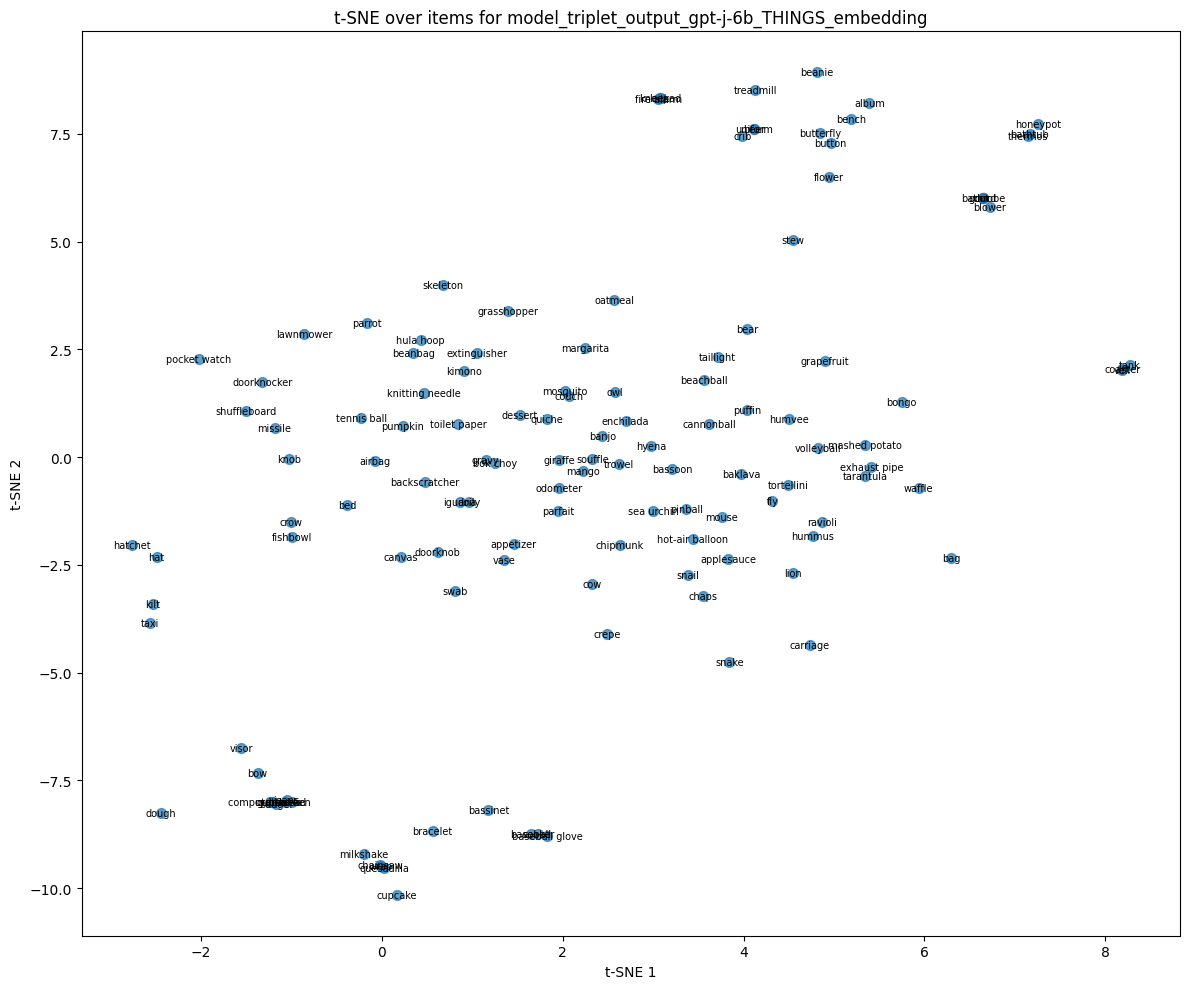

In [73]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Exact key
key = "model_triplet_output_gpt-j-6b_THINGS_embedding"
df_model = embeddings_set[key]

# 2. Extract embedding dimensions
dims = _dim_cols(df_model)
X = df_model[dims].to_numpy()

# Keep only finite rows
mask = np.isfinite(X).all(axis=1)
X = X[mask]
items = df_model.loc[mask, "item"].tolist()

print(f"Embedding shape for {key}: {X.shape}")

# 3. Run t-SNE
tsne = TSNE(n_components=2, metric="euclidean", perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X)

# 4. Plot
plt.figure(figsize=(12, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=50, alpha=0.7)

# Add item labels
for i, label in enumerate(items):
    plt.text(X_embedded[i, 0], X_embedded[i, 1], label,
             fontsize=7, ha="center", va="center")

plt.title(f"t-SNE over items for {key}")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()


Embedding shape for model_triplet_output_qwen25-14b-instruct_THINGS_embedding: (128, 30)


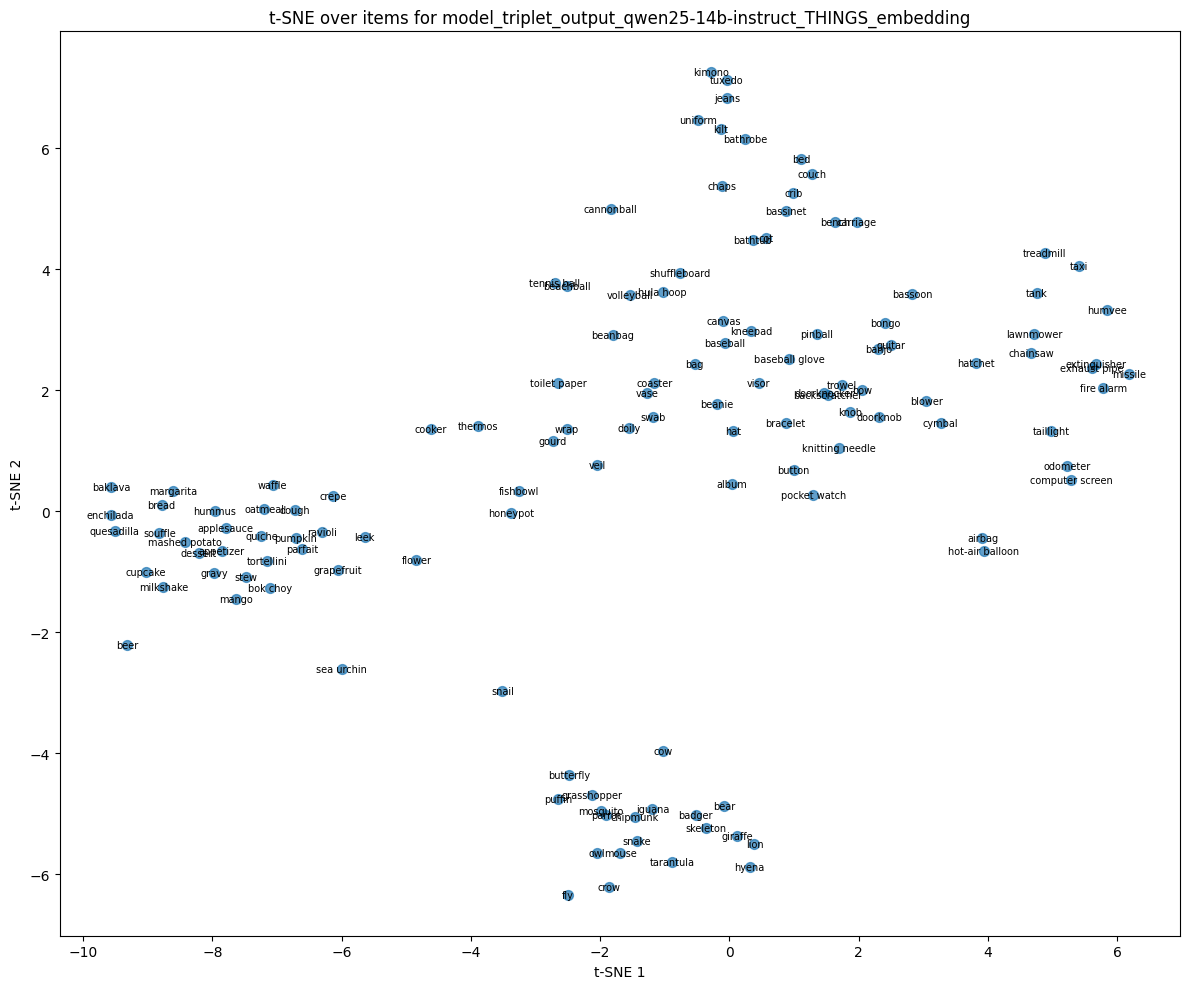

In [74]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Exact key
key = "model_triplet_output_qwen25-14b-instruct_THINGS_embedding"
df_model = embeddings_set[key]

# 2. Extract embedding dimensions
dims = _dim_cols(df_model)
X = df_model[dims].to_numpy()

# Keep only finite rows
mask = np.isfinite(X).all(axis=1)
X = X[mask]
items = df_model.loc[mask, "item"].tolist()

print(f"Embedding shape for {key}: {X.shape}")

# 3. Run t-SNE
tsne = TSNE(n_components=2, metric="euclidean", perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X)

# 4. Plot
plt.figure(figsize=(12, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=50, alpha=0.7)

# Add item labels
for i, label in enumerate(items):
    plt.text(X_embedded[i, 0], X_embedded[i, 1], label,
             fontsize=7, ha="center", va="center")

plt.title(f"t-SNE over items for {key}")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()


Embedding shape for model_triplet_output_gpt-oss-20b_THINGS_embedding: (128, 30)


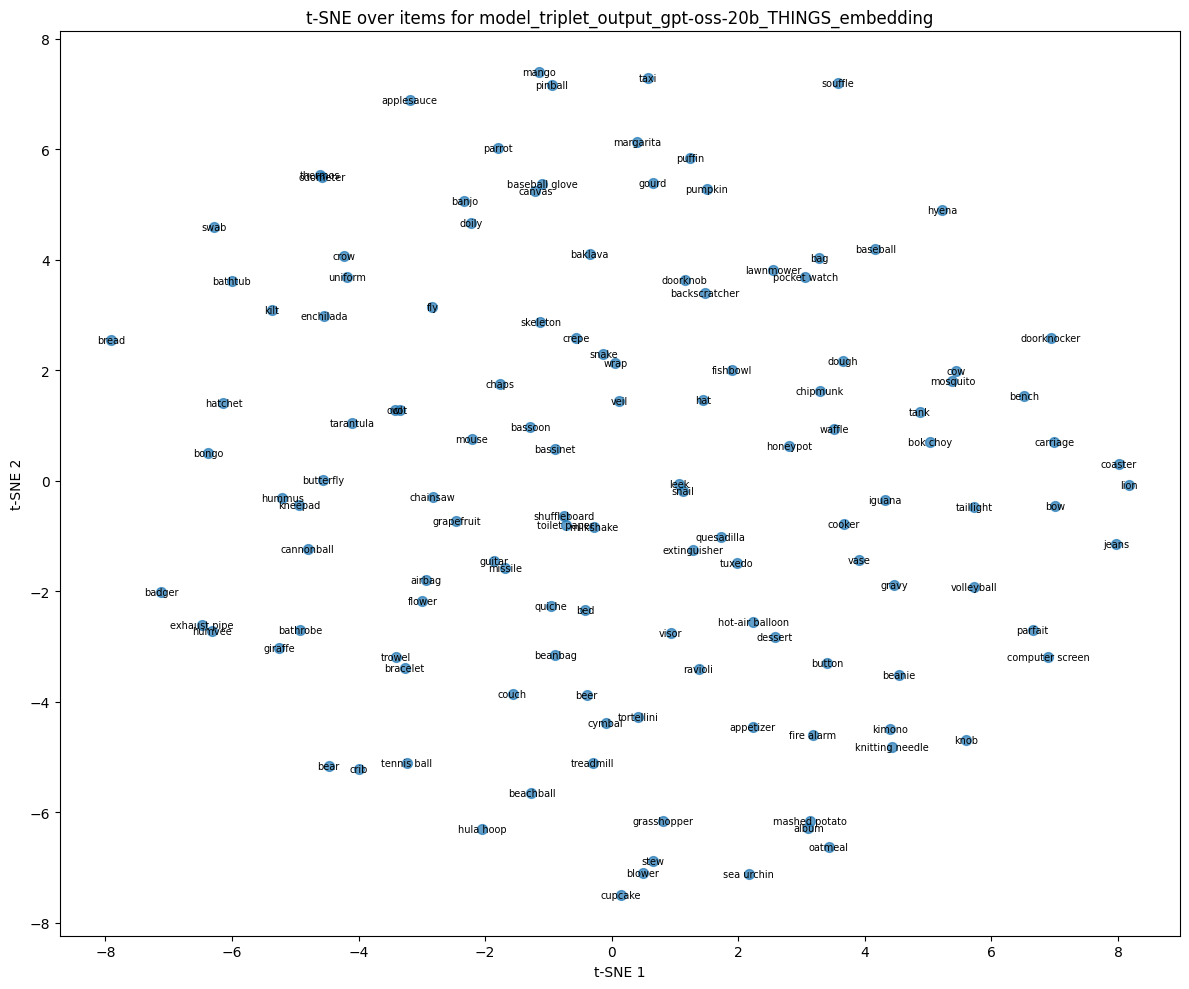

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Exact key
key = "model_triplet_output_gpt-oss-20b_THINGS_embedding"
df_model = embeddings_set[key]

# 2. Extract embedding dimensions
dims = _dim_cols(df_model)
X = df_model[dims].to_numpy()

# Keep only finite rows
mask = np.isfinite(X).all(axis=1)
X = X[mask]
items = df_model.loc[mask, "item"].tolist()

print(f"Embedding shape for {key}: {X.shape}")

# 3. Run t-SNE
tsne = TSNE(n_components=2, metric="euclidean", perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X)

# 4. Plot
plt.figure(figsize=(12, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=50, alpha=0.7)

# Add item labels
for i, label in enumerate(items):
    plt.text(X_embedded[i, 0], X_embedded[i, 1], label,
             fontsize=7, ha="center", va="center")

plt.title(f"t-SNE over items for {key}")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()


In [35]:
ref_df = embeddings_set["model_triplet_output_flan-t5-large_THINGS_embedding"]

In [78]:
###human embeddings postproc

filtered = embed_human[embed_human["item"].isin(ref_df["item"])].copy()


embed_split = filtered["embedding"].str.strip().str.split(r"\s+")

# convert list-of-strings to a numpy array of floats
embed_array = np.array(embed_split.tolist(), dtype=float)

embed_df = pd.DataFrame(embed_array, columns=[f"dim_{i}" for i in range(embed_array.shape[1])])

embed_human = pd.concat([filtered[["item"]].reset_index(drop=True), embed_df], axis=1)

Human embedding shape: (128, 49)


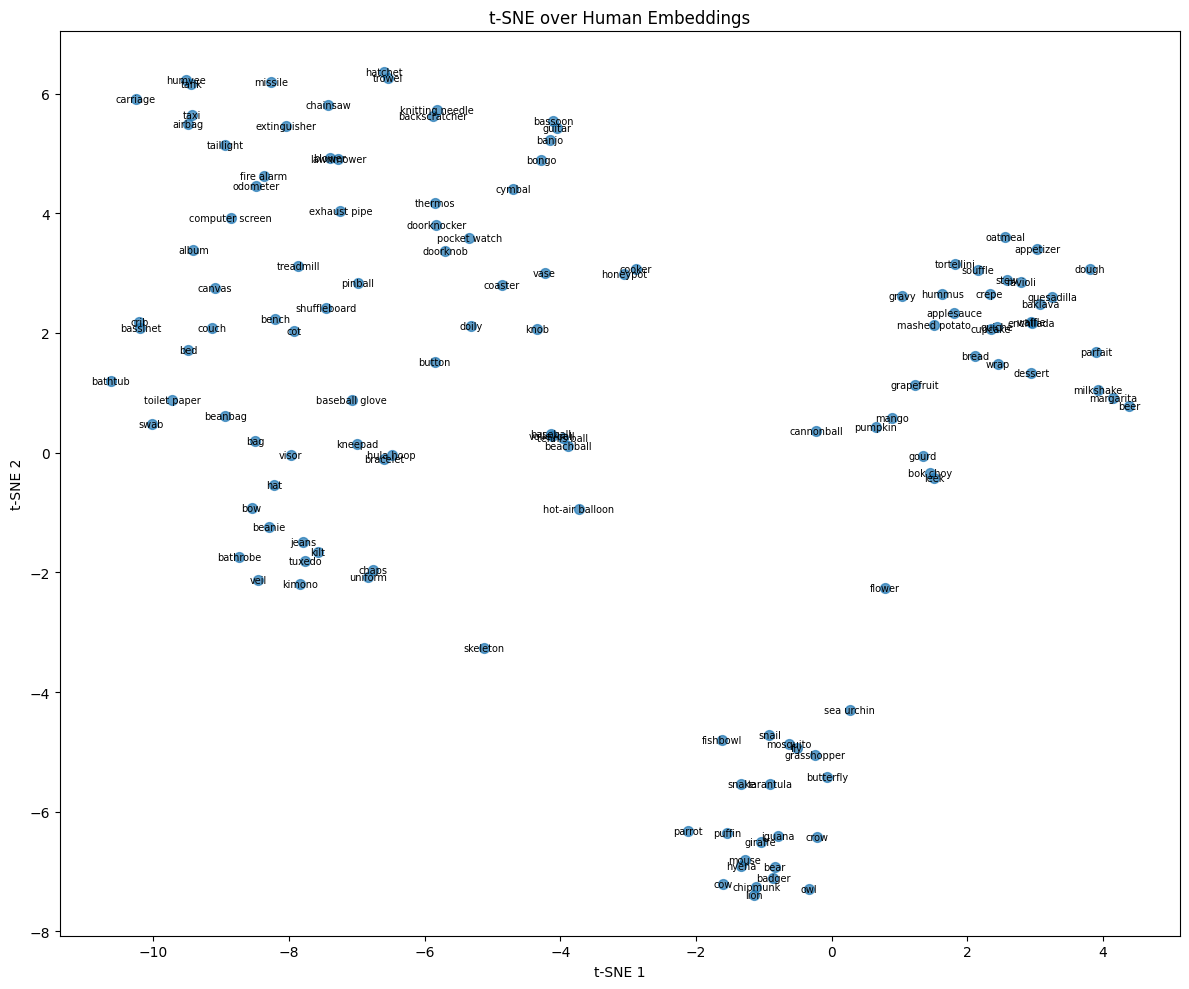

In [37]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 1. Extract embedding dims
dims = _dim_cols(embed_human)
X = embed_human[dims].to_numpy()

# Keep only finite rows
mask = np.isfinite(X).all(axis=1)
X = X[mask]
items = embed_human.loc[mask, "item"].tolist()

print(f"Human embedding shape: {X.shape}")

# 2. Run t-SNE
tsne = TSNE(n_components=2, metric="euclidean", perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X)

# 3. Plot
plt.figure(figsize=(12, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=50, alpha=0.7)

# Add item labels
for i, label in enumerate(items):
    plt.text(X_embedded[i, 0], X_embedded[i, 1], label,
             fontsize=7, ha="center", va="center")

plt.title("t-SNE over Human Embeddings")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()


In [77]:
embeddings_set

{'model_triplet_output_flan-t5-large_THINGS_embedding':               item   id     dim_0     dim_1     dim_2     dim_3     dim_4  \
 0           airbag    0  0.001855  0.036720 -0.068264 -0.107633  0.106385   
 1            album    1 -0.039189 -0.029274  0.072603 -0.141934  0.033133   
 2        appetizer    2 -0.081684  0.166768  0.145613 -0.057403 -0.005655   
 3       applesauce    3 -0.165377  0.063956  0.037388 -0.243653  0.181535   
 4    backscratcher    4  0.010812 -0.016572 -0.011989 -0.011228  0.002536   
 ..             ...  ...       ...       ...       ...       ...       ...   
 123           veil  123 -0.014974  0.152814  0.003785 -0.093355  0.083664   
 124          visor  124  0.005677  0.002265 -0.006083 -0.003961 -0.004067   
 125     volleyball  125 -0.026748  0.016014 -0.010099 -0.011273  0.055252   
 126         waffle  126 -0.058951  0.104078  0.113198  0.034025 -0.044215   
 127           wrap  127 -0.029862  0.033067  0.130560 -0.121181 -0.005076   
 
       

In [76]:
embed_human

item                                          embedding
0            aardvark  0.023445015773177147 0.2249102145433426 2.6347...
1              abacus  1.2162628173828125 0.2120264619588852 0.030790...
2           accordion  0.9413446187973022 0.04399370029568672 0.02270...
3               acorn  0.24573032557964325 1.0902433395385742 0.79046...
4     air conditioner  0.8160485625267029 0.045588210225105286 0.0108...
...               ...                                                ...
1818             yoke  1.667488932609558 0.19215841591358185 0.638313...
1819             yolk  0.05860885977745056 2.311476469039917 0.587398...
1820            zebra  0.05938627943396568 0.10155344754457474 2.4558...
1821           zipper  1.8932528495788574 0.005505918990820646 0.0307...
1822         zucchini  0.03671298921108246 1.767379879951477 0.375496...

[1823 rows x 2 columns]

In [79]:
embed_human

item     dim_0     dim_1     dim_2     dim_3     dim_4  \
0           airbag  0.786215  0.023945  0.033153  0.560827  0.607096   
1            album  0.415972  0.155268  0.122267  0.189745  0.705055   
2        appetizer  0.020445  2.219065  0.369195  0.046122  0.017854   
3       applesauce  0.001673  2.049309  0.172708  0.104558  0.098297   
4    backscratcher  0.896982  0.487595  0.007392  0.386752  0.515061   
..             ...       ...       ...       ...       ...       ...   
123           veil  0.019121  0.257362  0.434356  1.185996  0.434708   
124          visor  0.567935  0.009062  0.001321  1.330217  0.056407   
125     volleyball  0.584811  0.121071  0.044236  0.157246  0.114490   
126         waffle  0.120538  2.350663  0.180034  0.220126  0.034985   
127           wrap  0.004134  2.241327  0.152886  0.153242  0.005628   

        dim_5     dim_6     dim_7     dim_8  ...    dim_39    dim_40  \
0    0.014701  0.113329  1.462138  0.017732  ...  0.181120  0.056467   
1    0.843542  0.149999  0.067295  0.129211  ...  0.073186  0.016598   
2    0.017554  0.021855  0.023149  0.057674  ...  0.012422  0.018637   
3    0.010671  0.025055  0.008349  0.029043  ...  0.014620  0.059248   
4    0.031224  0.018100  0.038873  1.172099  ...  0.021019  0.017714   
..        ...       ...       ...       ...  ...       ...       ...   
123  0.059159  0.027625  0.001486  0.050581  ...  0.018059  0.692597   
124  0.751803  0.079832  0.089744  0.024067  ...  0.130770  0.687119   
125  0.089629  0.056066  0.204928  0.383896  ...  0.104902  0.028047   
126  0.015805  0.031389  0.006454  0.207090  ...  0.032220  0.041502   
127  0.472628  0.040863  0.049188  0.038591  ...  0.011973  0.008676   

       dim_41    dim_42    dim_43    dim_44    dim_45    dim_46    dim_47  \
0    0.006555  0.042922  0.021133  0.080762  0.164366  0.046507  0.082945   
1    0.054567  0.015597  0.015251  0.422372  0.003777  0.045398  0.902408   
2    0.062701  0.027943  0.015195  0.011998  0.016748  0.034608  0.034941   
3    0.016746  0.008135  0.013992  0.003715  0.026204  0.025778  0.012876   
4    0.052018  0.020591  0.043752  0.043642  0.080710  0.053721  0.025341   
..        ...       ...       ...       ...       ...       ...       ...   
123  0.047908  0.526144  0.018101  0.008396  0.005587  0.071846  0.491642   
124  0.042242  0.020895  0.070760  0.012084  0.029869  0.028398  0.025009   
125  0.104192  0.060126  0.053543  0.066023  0.010266  0.039731  0.004361   
126  0.133881  0.008460  0.047234  0.036174  0.022414  0.054968  0.033942   
127  0.005392  0.018218  0.028744  0.034729  0.003984  0.033034  0.007189   

       dim_48  
0    0.088907  
1    0.018070  
2    0.031725  
3    0.014261  
4    0.010225  
..        ...  
123  0.025274  
124  0.020569  
125  0.088417  
126  0.058099  
127  0.033506  

[128 rows x 50 columns]

model_triplet_output_flan-t5-large_THINGS_embedding columns: ['head', 'winner', 'loser', 'raw_generation']
              item   id     dim_0     dim_1     dim_2     dim_3     dim_4  \
0           airbag    0  0.001855  0.036720 -0.068264 -0.107633  0.106385   
1            album    1 -0.039189 -0.029274  0.072603 -0.141934  0.033133   
2        appetizer    2 -0.081684  0.166768  0.145613 -0.057403 -0.005655   
3       applesauce    3 -0.165377  0.063956  0.037388 -0.243653  0.181535   
4    backscratcher    4  0.010812 -0.016572 -0.011989 -0.011228  0.002536   
..             ...  ...       ...       ...       ...       ...       ...   
123           veil  123 -0.014974  0.152814  0.003785 -0.093355  0.083664   
124          visor  124  0.005677  0.002265 -0.006083 -0.003961 -0.004067   
125     volleyball  125 -0.026748  0.016014 -0.010099 -0.011273  0.055252   
126         waffle  126 -0.058951  0.104078  0.113198  0.034025 -0.044215   
127           wrap  127 -0.029862  0.033067  0

/tmp/ipykernel_1960618/2896194758.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=r2_df, x="r2", y="model", palette="viridis", edgecolor="black")


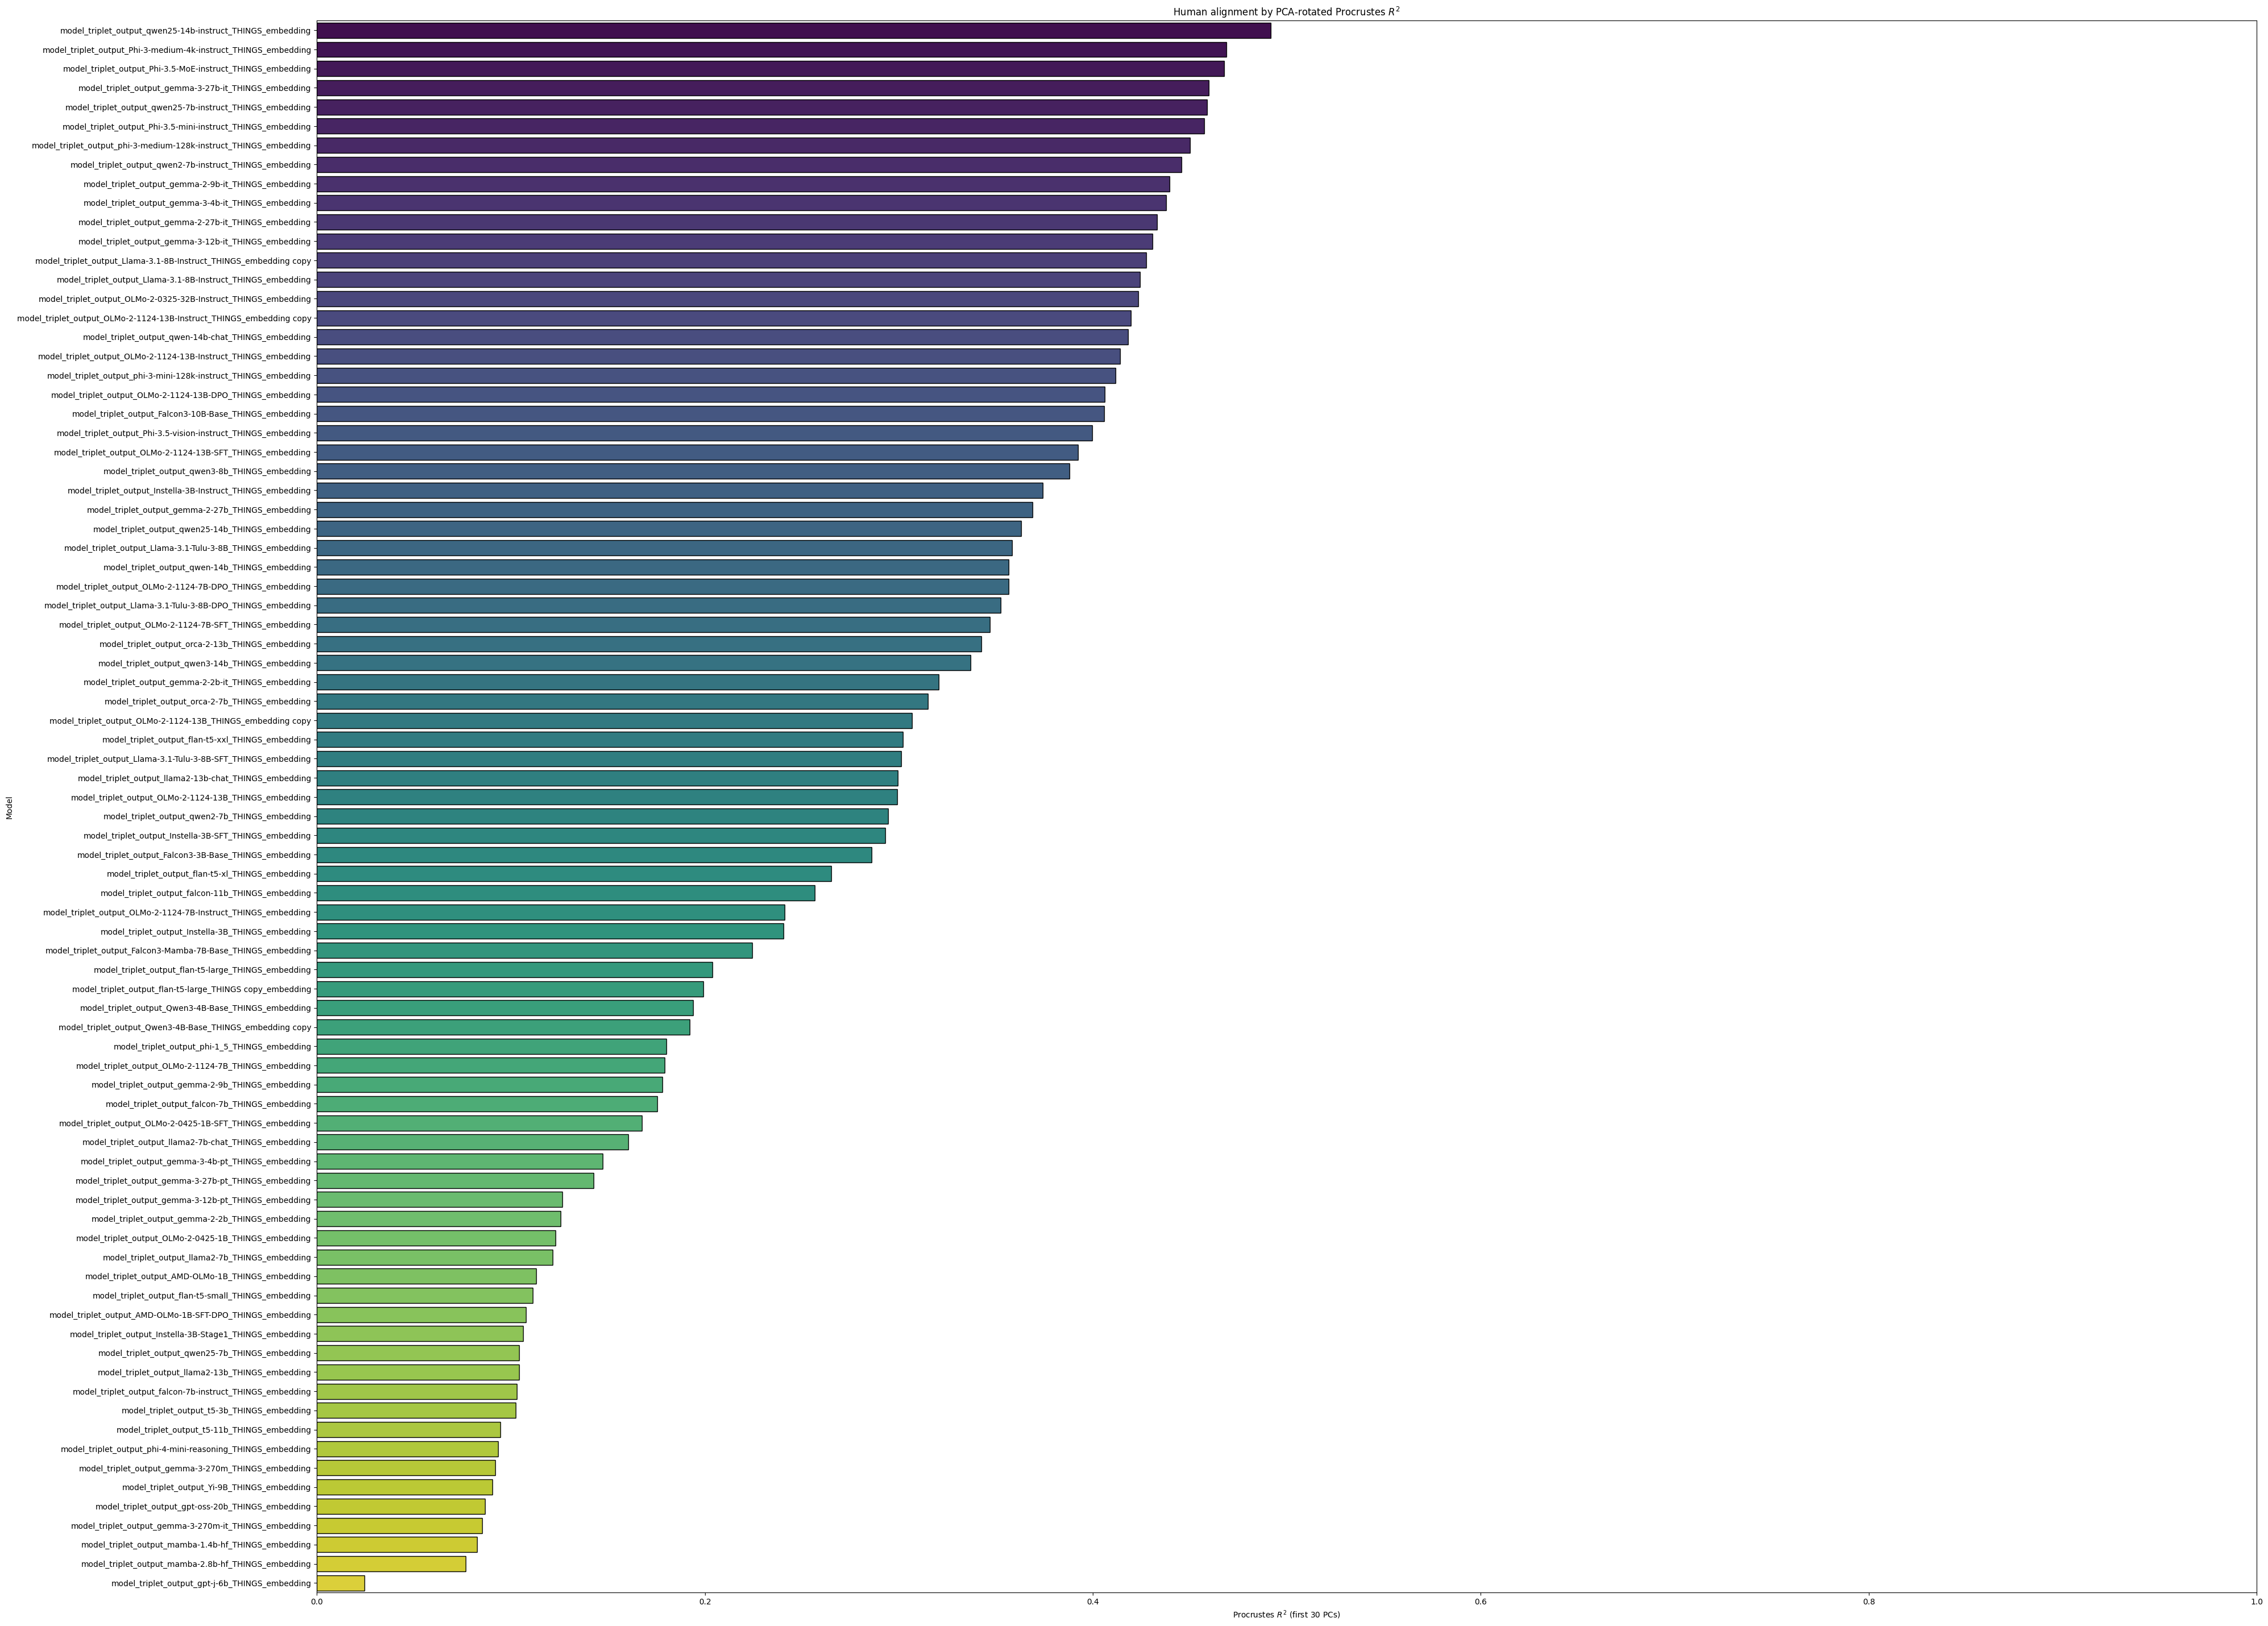

In [80]:
from sklearn.decomposition import PCA
from scipy.spatial import procrustes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def procrustes_r2_spatial(X, Y):
    _, _, disparity = procrustes(X, Y)
    return float(np.clip(1.0 - float(disparity), 0.0, 1.0))

def _dim_cols(df: pd.DataFrame):
    cols = [c for c in df.columns if c.startswith("dim_")]
    return sorted(cols, key=lambda c: int(c.split("_")[1]))  # numeric order

def rotated_procrustes(df_human: pd.DataFrame, df_model: pd.DataFrame, n_dims: int, name=""):
    # 1) Align items exactly
    shared = sorted(set(df_human["item"]).intersection(df_model["item"]))
    if not shared:
        print(f"[NaN] {name}: no shared items")
        return np.nan
    
    print(df_model)
    print("human")
    print(df_human)
    A = df_human[df_human["item"].isin(shared)].sort_values("item").reset_index(drop=True)
    B = df_model[df_model["item"].isin(shared)].sort_values("item").reset_index(drop=True)

    # 2) Build matrices with numerically-sorted dim columns
    dimsA = _dim_cols(A)[:n_dims]
    dimsB = _dim_cols(B)[:n_dims]
    if len(dimsA) == 0 or len(dimsB) == 0:
        print(f"[NaN] {name}: no dim_ columns found")
        return np.nan

    X1 = A[dimsA].to_numpy()
    X2 = B[dimsB].to_numpy()

    # 3) Keep only rows that are finite in BOTH
    mask = np.isfinite(X1).all(axis=1) & np.isfinite(X2).all(axis=1)
    X1, X2 = X1[mask], X2[mask]

    # 4) Choose a single k used by BOTH PCAs (avoids later slicing quirks)
    k = min(
        n_dims,
        X1.shape[1], X2.shape[1],   # features available
        X1.shape[0], X2.shape[0]    # samples available (PCA can't have n_components > n_samples)
    )
    if k < 1 or X1.shape[0] < 2 or X2.shape[0] < 2:
        print(f"[NaN] {name}: k={k}, rows={X1.shape[0]}/{X2.shape[0]}")
        return np.nan

    # 5) PCA-rotate each space separately with the SAME k
    X1_rot = PCA(n_components=k, svd_solver="full").fit_transform(X1)
    X2_rot = PCA(n_components=k, svd_solver="full").fit_transform(X2)

    # 6) Procrustes on the rotated spaces
    return procrustes_r2_spatial(X1_rot, X2_rot)

# --- Run: human vs each model in embeddings_set ---
n_dims = 30
rows = []
for key, model_df in embeddings_set.items():
    print(key, "columns:", df.columns.tolist())

    if key.lower() == "human":
        continue
    r2 = rotated_procrustes(embed_human, model_df, n_dims, name=key)
    rows.append({"model": key, "r2": r2})

r2_df = pd.DataFrame(rows).sort_values("r2", ascending=False)
print(r2_df)

plt.figure(figsize=(40, max(3.5, 0.35 * len(r2_df))))
sns.barplot(data=r2_df, x="r2", y="model", palette="viridis", edgecolor="black")
plt.xlim(0, 1)
plt.xlabel(f"Procrustes $R^2$ (first {n_dims} PCs)")
plt.ylabel("Model")
plt.title("Human alignment by PCA-rotated Procrustes $R^2$")
plt.tight_layout()
plt.show()


In [81]:
# --- compute RDM + CKA for each model already in r2_df ---
rdm_vals = []
cka_vals = []

for key in r2_df["model"]:
    model_df = embeddings_set[key]

    # Align shared items
    shared = sorted(set(embed_human["item"]).intersection(model_df["item"]))
    if not shared:
        rdm_vals.append(np.nan)
        cka_vals.append(np.nan)
        continue

    A = embed_human[embed_human["item"].isin(shared)].sort_values("item").reset_index(drop=True)
    B = model_df[model_df["item"].isin(shared)].sort_values("item").reset_index(drop=True)

    dimsA = [c for c in A.columns if c.startswith("dim_")]
    dimsB = [c for c in B.columns if c.startswith("dim_")]

    X1 = A[dimsA].to_numpy()
    X2 = B[dimsB].to_numpy()

    mask = np.isfinite(X1).all(axis=1) & np.isfinite(X2).all(axis=1)
    X1, X2 = X1[mask], X2[mask]

    if X1.shape[0] < 3 or X2.shape[0] < 3:
        rdm_vals.append(np.nan)
        cka_vals.append(np.nan)
        continue

    # --- RDM correlation ---
    from scipy.spatial.distance import pdist, squareform
    from scipy.stats import spearmanr

    D1 = squareform(pdist(X1, metric="correlation"))
    D2 = squareform(pdist(X2, metric="correlation"))
    triu_idx = np.triu_indices_from(D1, k=1)
    rdm_corr = spearmanr(D1[triu_idx], D2[triu_idx]).correlation

    # --- Linear CKA ---
    X1c = X1 - X1.mean(axis=0, keepdims=True)
    X2c = X2 - X2.mean(axis=0, keepdims=True)
    numerator = np.linalg.norm(X1c.T @ X2c, ord='fro') ** 2
    denom = np.linalg.norm(X1c.T @ X1c, ord='fro') * np.linalg.norm(X2c.T @ X2c, ord='fro')
    cka_val = numerator / denom

    rdm_vals.append(rdm_corr)
    cka_vals.append(cka_val)

# --- add new columns to r2_df ---
r2_df["rdm_corr"] = rdm_vals
r2_df["cka"] = cka_vals

# --- export ---
r2_df.to_csv("alignment_results_full.csv", index=False)

print("✅ Saved merged results with Procrustes, RDM correlation, and CKA to alignment_results_full.csv")
print(r2_df.head())


✅ Saved merged results with Procrustes, RDM correlation, and CKA to alignment_results_full.csv
                                                model        r2  rdm_corr  \
58  model_triplet_output_qwen25-14b-instruct_THING...  0.491798  0.636479   
55  model_triplet_output_Phi-3-medium-4k-instruct_...  0.468913  0.647438   
70  model_triplet_output_Phi-3.5-MoE-instruct_THIN...  0.467597  0.601368   
38  model_triplet_output_gemma-3-27b-it_THINGS_emb...  0.459731  0.613899   
27  model_triplet_output_qwen25-7b-instruct_THINGS...  0.459009  0.594460   

         cka  
58  0.702113  
55  0.642572  
70  0.649253  
38  0.642256  
27  0.665128  


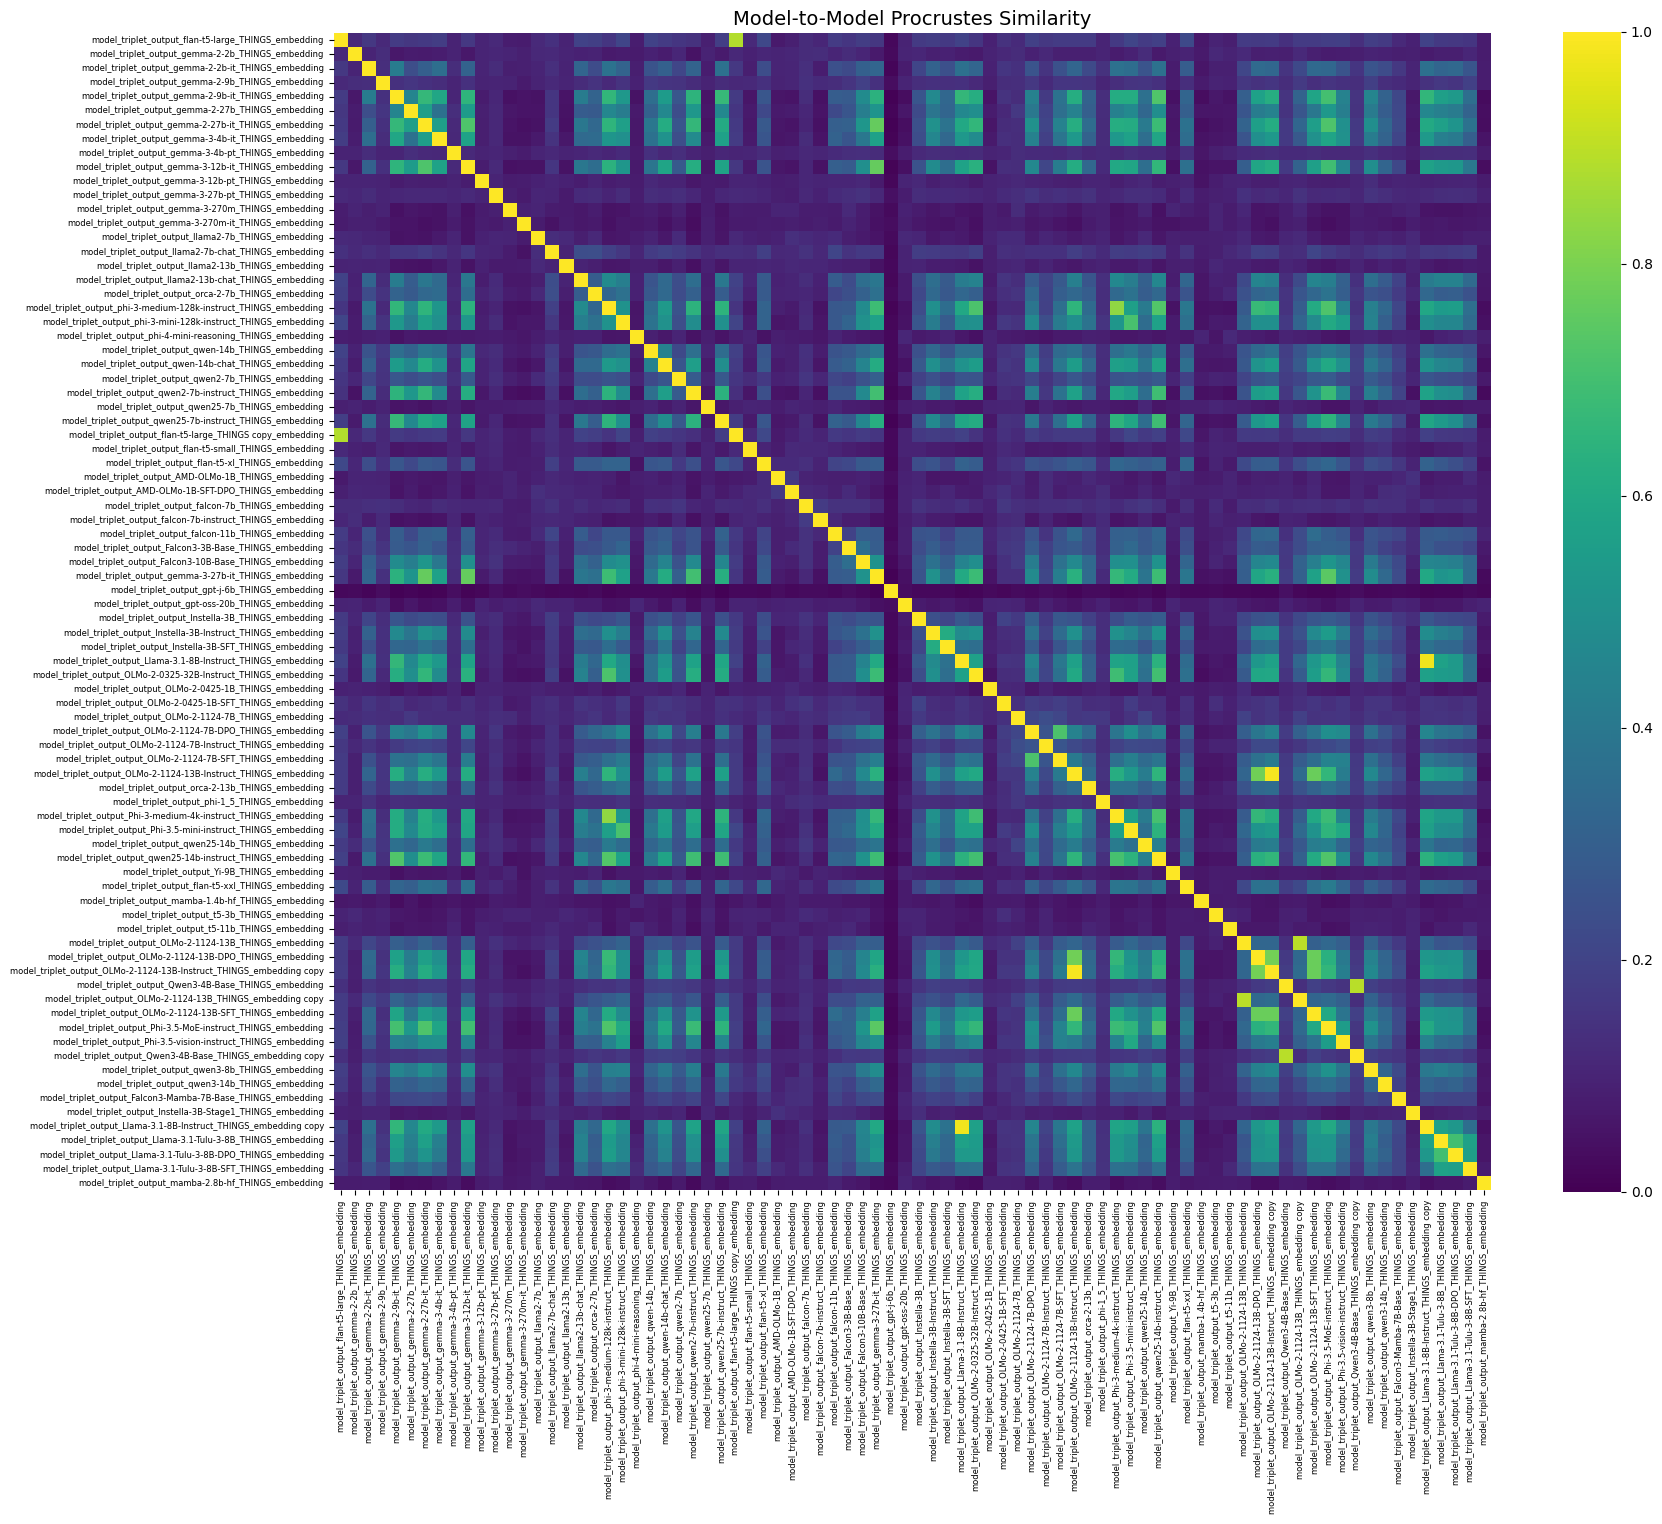

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import procrustes

# --- Collect embeddings for each model ---
embs = {}
for key, model_df in embeddings_set.items():
    if key.lower() == "human":
        continue

    dims = _dim_cols(model_df)
    if not dims:
        continue

    X = model_df[dims].to_numpy()
    mask = np.isfinite(X).all(axis=1)
    X = X[mask]

    if X.shape[0] < 3:
        continue

    embs[key] = X

# --- Compute pairwise Procrustes similarities ---
models = list(embs.keys())
mat = np.zeros((len(models), len(models)))

for i, m1 in enumerate(models):
    for j, m2 in enumerate(models):
        if i <= j:
            X1, X2 = embs[m1], embs[m2]

            # Must use the same number of rows
            n = min(len(X1), len(X2))
            X1, X2 = X1[:n], X2[:n]

            # Run Procrustes
            _, _, disparity = procrustes(X1, X2)

            # Convert disparity (lower = better) to similarity
            sim = 1 - disparity

            mat[i, j] = sim
            mat[j, i] = sim

plt.figure(figsize=(18, 15))
sns.heatmap(
    mat,
    cmap="viridis", vmin=0, vmax=1,
    cbar=True, square=True,
    xticklabels=models, yticklabels=models,
    annot=False
)

plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=6)
plt.title("Model-to-Model Procrustes Similarity", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
!pip install umap

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'umap' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'umap'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3541 sha256=562406b26a3dec94bbf64daf427f43033c08442248beb7e1e4195e8ddc861536
  Stored in directory: /mnt/home/zstuddiford/.cache/pip/wheels/82/d8/73/e9eb3334baaad795ff0278363ff1aca7568bdf2793e452a527
Successfully built umap


: 

: 

: 

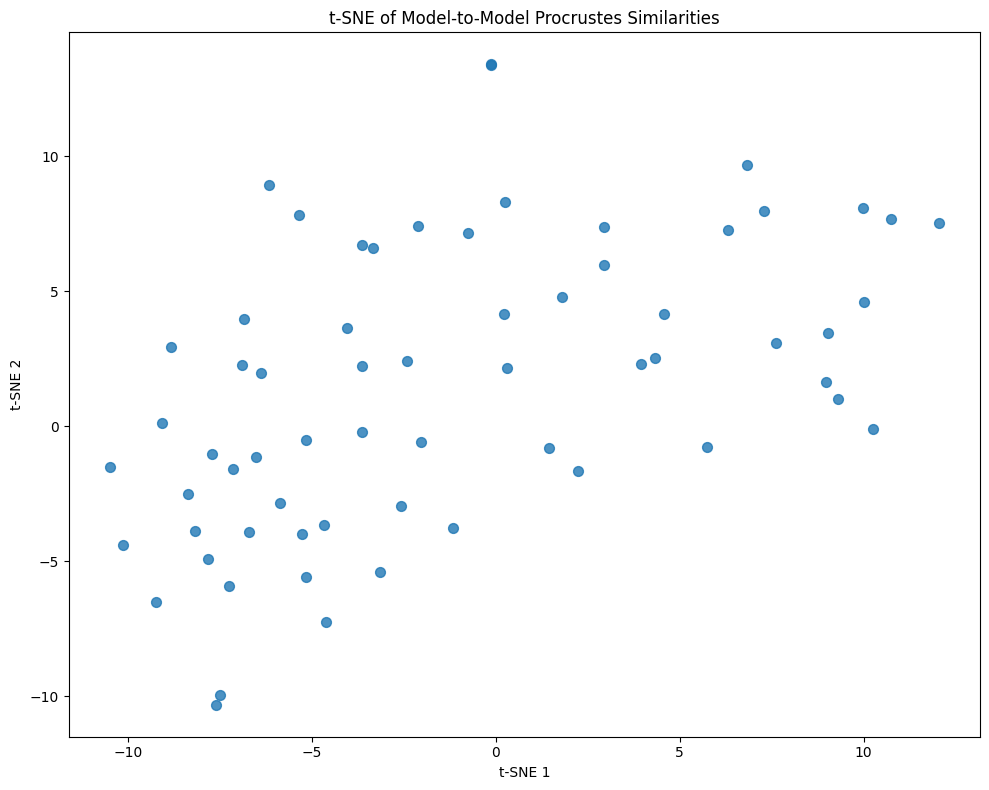

: 

: 

: 

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Clean model names
clean_models = [
    name.replace("model_triplet_output_", "").replace("_THINGS_embedding", "")
    for name in models
]

# Convert Procrustes similarity matrix into a distance matrix
dist_mat = 1 - mat

# Run t-SNE on the distance matrix
tsne = TSNE(
    n_components=2,
    metric="precomputed",   # we already have distances
    init="random",          # required when metric="precomputed"
    random_state=42,
    perplexity=10
)
X_embedded = tsne.fit_transform(dist_mat)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=50, alpha=0.8)

plt.title("t-SNE of Model-to-Model Procrustes Similarities")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()


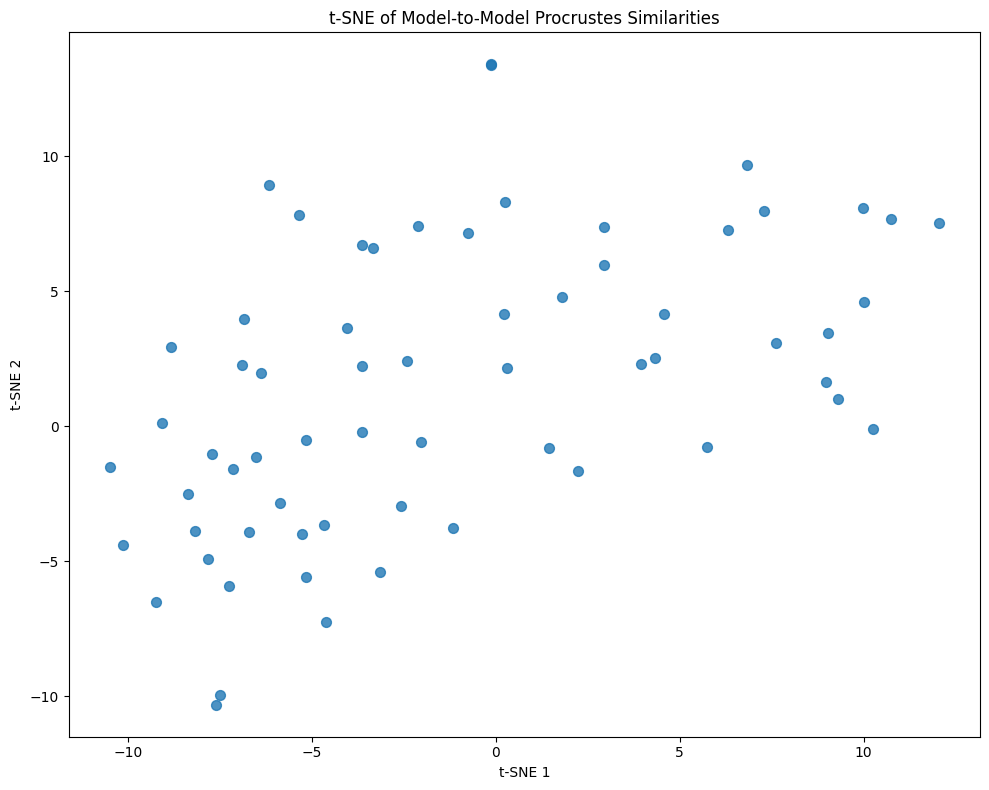

: 

: 

: 

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Clean model names
clean_models = [
    name.replace("model_triplet_output_", "").replace("_THINGS_embedding", "")
    for name in models
]

# Convert Procrustes similarity matrix into a distance matrix
dist_mat = 1 - mat

# Run t-SNE on the distance matrix
tsne = TSNE(
    n_components=2,
    metric="precomputed",   # we already have distances
    init="random",          # required when metric="precomputed"
    random_state=42,
    perplexity=10
)
X_embedded = tsne.fit_transform(dist_mat)

# Save to CSV
coords_df = pd.DataFrame({
    "model": clean_models,
    "tsne_1": X_embedded[:, 0],
    "tsne_2": X_embedded[:, 1]
})
coords_df.to_csv("tsne_procrustes_coords.csv", index=False)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=50, alpha=0.8)

plt.title("t-SNE of Model-to-Model Procrustes Similarities")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr

# --- helper: select dim columns in numeric order ---
def _dim_cols(df: pd.DataFrame):
    cols = [c for c in df.columns if c.startswith("dim_")]
    return sorted(cols, key=lambda c: int(c.split("_")[1]))

# --- helper: compute RDM (now cosine-based) ---
def compute_rdm(X: np.ndarray, metric="cosine"):
    return squareform(pdist(X, metric=metric))

# --- helper: correlation between two RDMs ---
def rdm_correlation(X, Y, metric="cosine", corr="spearman"):
    D1 = compute_rdm(X, metric=metric)
    D2 = compute_rdm(Y, metric=metric)
    triu_idx = np.triu_indices_from(D1, k=1)
    v1, v2 = D1[triu_idx], D2[triu_idx]
    if corr == "spearman":
        return spearmanr(v1, v2).correlation
    elif corr == "pearson":
        return np.corrcoef(v1, v2)[0, 1]
    else:
        raise ValueError(f"Unknown corr: {corr}")

# --- helper: CKA ---
def linear_cka(X, Y):
    """
    Linear CKA between two (n_samples, n_features) matrices.
    """
    # Center columns
    X = X - X.mean(axis=0, keepdims=True)
    Y = Y - Y.mean(axis=0, keepdims=True)

    # HSIC numerator
    numerator = np.linalg.norm(X.T @ Y, ord='fro') ** 2

    # HSIC denominators
    denom_x = np.linalg.norm(X.T @ X, ord='fro')
    denom_y = np.linalg.norm(Y.T @ Y, ord='fro')

    return numerator / (denom_x * denom_y)

# --- wrapper: human vs model, RDM + CKA ---
def compare_representations(df_human: pd.DataFrame, df_model: pd.DataFrame, name=""):
    # 1) Align shared items
    shared = sorted(set(df_human["item"]).intersection(df_model["item"]))
    if not shared:
        print(f"[NaN] {name}: no shared items")
        return {"model": name, "rdm_corr": np.nan, "cka": np.nan}

    A = df_human[df_human["item"].isin(shared)].sort_values("item").reset_index(drop=True)
    B = df_model[df_model["item"].isin(shared)].sort_values("item").reset_index(drop=True)

    # 2) Extract dim columns
    dimsA = _dim_cols(A)
    dimsB = _dim_cols(B)
    if len(dimsA) == 0 or len(dimsB) == 0:
        print(f"[NaN] {name}: no dim_ columns found")
        return {"model": name, "rdm_corr": np.nan, "cka": np.nan}

    X1 = A[dimsA].to_numpy()
    X2 = B[dimsB].to_numpy()

    # 3) Keep finite
    mask = np.isfinite(X1).all(axis=1) & np.isfinite(X2).all(axis=1)
    X1, X2 = X1[mask], X2[mask]

    if X1.shape[0] < 3 or X2.shape[0] < 3:
        print(f"[NaN] {name}: too few rows ({X1.shape[0]}, {X2.shape[0]})")
        return {"model": name, "rdm_corr": np.nan, "cka": np.nan}

    # 4) Metrics (now cosine RDM)
    rdm_corr = rdm_correlation(X1, X2, metric="cosine", corr="pearson")
    cka_val   = linear_cka(X1, X2)

    return {"model": name, "rdm_corr": rdm_corr, "cka": cka_val}

# --- Run: human vs each model ---
rows = []
for key, model_df in embeddings_set.items():
    if key.lower() == "human":
        continue
    res = compare_representations(embed_human, model_df, name=key)
    rows.append(res)

results_df = pd.DataFrame(rows).sort_values("rdm_corr", ascending=False)
print(results_df)

# --- Plot both metrics side by side ---
fig, axes = plt.subplots(1, 2, figsize=(16, max(3.5, 0.35 * len(results_df))))

sns.barplot(data=results_df, x="rdm_corr", y="model", ax=axes[0],
            palette="viridis", edgecolor="black")
axes[0].set_xlim(-1, 1)
axes[0].set_xlabel("RDM correlation (Spearman)")
axes[0].set_ylabel("Model")
axes[0].set_title("Human alignment by RDM correlation (cosine RDMs)")

sns.barplot(data=results_df, x="cka", y="model", ax=axes[1],
            palette="magma", edgecolor="black")
axes[1].set_xlim(0, 1)
axes[1].set_xlabel("CKA similarity")
axes[1].set_ylabel("")
axes[1].set_title("Human alignment by CKA")

plt.tight_layout()
plt.show()


KeyError: 'item'

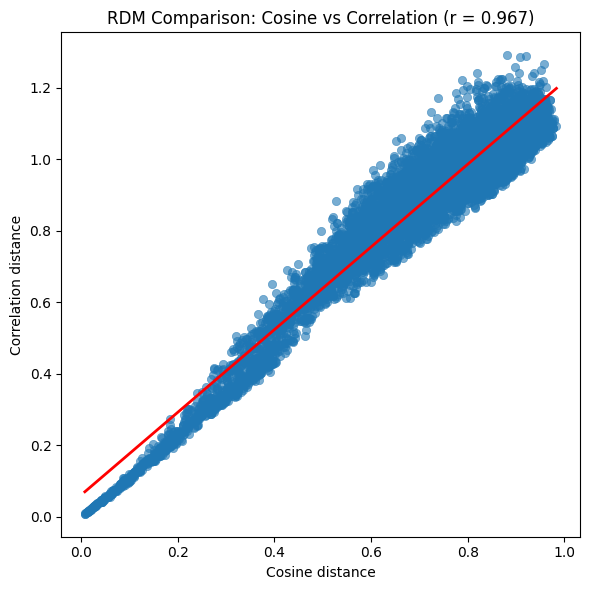

: 

: 

: 

In [ ]:
# --- Compute both RDMs (cosine & correlation) ---
X = embed_human[_dim_cols(embed_human)].to_numpy()

rdm_cosine = compute_rdm(X, metric="cosine")
rdm_corr   = compute_rdm(X, metric="correlation")

# --- Flatten upper triangle (ignore diagonal & duplicates) ---
triu_idx = np.triu_indices_from(rdm_cosine, k=1)
vals_cosine = rdm_cosine[triu_idx]
vals_corr   = rdm_corr[triu_idx]

# --- Put into dataframe ---
df_rdm = pd.DataFrame({
    "Cosine": vals_cosine,
    "Correlation": vals_corr
})

# --- Plot scatter / correlation plot ---
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df_rdm, x="Cosine", y="Correlation", alpha=0.6, edgecolor=None)

# Add line of best fit
sns.regplot(data=df_rdm, x="Cosine", y="Correlation",
            scatter=False, ci=None, color="red", line_kws={"lw":2})

# Annotate correlation value
r_val = np.corrcoef(vals_cosine, vals_corr)[0, 1]
plt.title(f"RDM Comparison: Cosine vs Correlation (r = {r_val:.3f})")
plt.xlabel("Cosine distance")
plt.ylabel("Correlation distance")

plt.tight_layout()
plt.show()


In [ ]:
# Merge on model
merged_df = r2_df.merge(results_df, on="model", how="inner")

# Export to CSV
merged_df.to_csv("alignment_results.csv", index=False)

print("Merged and saved to alignment_results.csv")
print(merged_df.head())


Merged and saved to alignment_results.csv
                                               model  r2  rdm_corr       cka
0  model_triplet_output_flan-t5-large_THINGS_embe... NaN  0.307051  0.288495
1   model_triplet_output_gemma-2-2b_THINGS_embedding NaN  0.045879  0.140113
2  model_triplet_output_gemma-2-2b-it_THINGS_embe... NaN  0.522086  0.483059
3   model_triplet_output_gemma-2-9b_THINGS_embedding NaN  0.202691  0.237628
4  model_triplet_output_gemma-2-9b-it_THINGS_embe... NaN  0.663768  0.664769


: 

: 

: 

In [ ]:
r2_df

model        r2  rdm_corr  \
58  model_triplet_output_qwen25-14b-instruct_THING...  0.491798  0.636479   
55  model_triplet_output_Phi-3-medium-4k-instruct_...  0.468913  0.647438   
38  model_triplet_output_gemma-3-27b-it_THINGS_emb...  0.459731  0.613899   
27  model_triplet_output_qwen25-7b-instruct_THINGS...  0.459009  0.594460   
56  model_triplet_output_Phi-3.5-mini-instruct_THI...  0.457437  0.570101   
..                                                ...       ...       ...   
59        model_triplet_output_Yi-9B_THINGS_embedding  0.090551  0.016379   
40  model_triplet_output_gpt-oss-20b_THINGS_embedding  0.086543 -0.010191   
13  model_triplet_output_gemma-3-270m-it_THINGS_em...  0.085273  0.012516   
61  model_triplet_output_mamba-1.4b-hf_THINGS_embe...  0.082597  0.001555   
39     model_triplet_output_gpt-j-6b_THINGS_embedding  0.024608 -0.000586   

         cka  
58  0.702113  
55  0.642572  
38  0.642256  
27  0.665128  
56  0.640930  
..       ...  
59  0.091191  
40  0.084147  
13  0.074579  
61  0.079291  
39  0.033585  

[64 rows x 4 columns]

: 

: 

: 

In [ ]:
print(r2_df["model"].tolist())


['model_triplet_output_qwen25-14b-instruct_THINGS_embedding', 'model_triplet_output_Phi-3-medium-4k-instruct_THINGS_embedding', 'model_triplet_output_gemma-3-27b-it_THINGS_embedding', 'model_triplet_output_qwen25-7b-instruct_THINGS_embedding', 'model_triplet_output_Phi-3.5-mini-instruct_THINGS_embedding', 'model_triplet_output_phi-3-medium-128k-instruct_THINGS_embedding', 'model_triplet_output_qwen2-7b-instruct_THINGS_embedding', 'model_triplet_output_gemma-2-9b-it_THINGS_embedding', 'model_triplet_output_gemma-3-4b-it_THINGS_embedding', 'model_triplet_output_gemma-2-27b-it_THINGS_embedding', 'model_triplet_output_gemma-3-12b-it_THINGS_embedding', 'model_triplet_output_Llama-3.1-8B-Instruct_THINGS_embedding', 'model_triplet_output_OLMo-2-0325-32B-Instruct_THINGS_embedding', 'model_triplet_output_qwen-14b-chat_THINGS_embedding', 'model_triplet_output_OLMo-2-1124-13B-Instruct_THINGS_embedding', 'model_triplet_output_phi-3-mini-128k-instruct_THINGS_embedding', 'model_triplet_output_Falcon

: 

: 

: 

In [ ]:
r2_df.to_csv("r2_df.csv", index=False)

: 

: 

: 

In [ ]:
import re

# --- Step 1: Extract base name from r2_df.model ---
def clean_model_name(messy: str) -> str:
    # Grab the part between 'output_' and '_THINGS'
    m = re.search(r'output_(.*?)(_THINGS|_THINGS copy)', messy)
    if not m:
        return messy
    name = m.group(1)

    # --- Step 2: Normalize common patterns ---
    name = name.replace("qwen25", "qwen-2.5")
    name = name.replace("qwen2", "qwen-2")
    name = name.replace("llama2", "llama-2")
    name = name.replace("Llama", "Llama")  # keep capitalized variants
    name = name.replace("phi-4-mini-reasoning", "phi-4-mini-reasoning")  # leave if props has it
    name = name.replace("phi-3.5", "phi-3.5")
    name = name.replace("phi-3-mini", "phi-3-mini")
    name = name.replace("phi-3-medium", "phi-3-medium")
    name = name.replace("Instella", "amd/Instella")
    name = name.replace("AMO-OLMo", "AMD-OLMo")  # safeguard
    name = name.replace("OLMo-", "allenai/OLMo-") if "OLMo-" in name and not name.startswith("allenai") and not name.startswith("AMD") else name

    return name

# Apply cleaning
r2_df["name"] = r2_df["model"].apply(clean_model_name)

# --- Step 3: Merge on clean names ---
merged_df = model_props.merge(r2_df[["name", "r2"]], on="name", how="left")

# Save out
merged_df.to_csv("model_props_with_r2.csv", index=False)

print(merged_df[["name", "r2"]].head(20))


KeyError: "['r2'] not in index"

: 

: 

: 

In [ ]:
# manual mapping from earlier table
ift_map = {
    "model_triplet_output_qwen25-14b-instruct_THINGS_embedding": 1,
    "model_triplet_output_Phi-3-medium-4k-instruct_THINGS_embedding": 1,
    "model_triplet_output_gemma-3-27b-it_THINGS_embedding": 1,
    "model_triplet_output_qwen25-7b-instruct_THINGS_embedding": 1,
    "model_triplet_output_Phi-3.5-mini-instruct_THINGS_embedding": 1,
    "model_triplet_output_phi-3-medium-128k-instruct_THINGS_embedding": 1,
    "model_triplet_output_qwen2-7b-instruct_THINGS_embedding": 1,
    "model_triplet_output_gemma-2-9b-it_THINGS_embedding": 1,
    "model_triplet_output_gemma-3-4b-it_THINGS_embedding": 1,
    "model_triplet_output_gemma-2-27b-it_THINGS_embedding": 1,
    "model_triplet_output_gemma-3-12b-it_THINGS_embedding": 1,
    "model_triplet_output_Llama-3.1-8B-Instruct_THINGS_embedding": 1,
    "model_triplet_output_OLMo-2-0325-32B-Instruct_THINGS_embedding": 1,
    "model_triplet_output_qwen-14b-chat_THINGS_embedding": 1,
    "model_triplet_output_OLMo-2-1124-13B-Instruct_THINGS_embedding": 1,
    "model_triplet_output_phi-3-mini-128k-instruct_THINGS_embedding": 1,
    "model_triplet_output_Falcon3-10B-Base_THINGS_embedding": 0,
    "model_triplet_output_Instella-3B-Instruct_THINGS_embedding": 1,
    "model_triplet_output_gemma-2-27b_THINGS_embedding": 0,
    "model_triplet_output_qwen25-14b_THINGS_embedding": 0,
    "model_triplet_output_qwen-14b_THINGS_embedding": 0,
    "model_triplet_output_OLMo-2-1124-7B-DPO_THINGS_embedding": 1,
    "model_triplet_output_OLMo-2-1124-7B-SFT_THINGS_embedding": 1,
    "model_triplet_output_orca-2-13b_THINGS_embedding": 0,
    "model_triplet_output_gemma-2-2b-it_THINGS_embedding": 1,
    "model_triplet_output_orca-2-7b_THINGS_embedding": 0,
    "model_triplet_output_flan-t5-xxl_THINGS_embedding": 1,
    "model_triplet_output_llama2-13b-chat_THINGS_embedding": 1,
    "model_triplet_output_qwen2-7b_THINGS_embedding": 0,
    "model_triplet_output_Instella-3B-SFT_THINGS_embedding": 1,
    "model_triplet_output_Falcon3-3B-Base_THINGS_embedding": 0,
    "model_triplet_output_flan-t5-xl_THINGS_embedding": 1,
    "model_triplet_output_falcon-11b_THINGS_embedding": 0,
    "model_triplet_output_OLMo-2-1124-7B-Instruct_THINGS_embedding": 1,
    "model_triplet_output_Instella-3B_THINGS_embedding": 0,
    "model_triplet_output_flan-t5-large_THINGS_embedding": 1,
    "model_triplet_output_flan-t5-large_THINGS copy_embedding": 1,
    "model_triplet_output_phi-1_5_THINGS_embedding": 0,
    "model_triplet_output_OLMo-2-1124-7B_THINGS_embedding": 0,
    "model_triplet_output_gemma-2-9b_THINGS_embedding": 0,
    "model_triplet_output_falcon-7b_THINGS_embedding": 0,
    "model_triplet_output_OLMo-2-0425-1B-SFT_THINGS_embedding": 1,
    "model_triplet_output_llama2-7b-chat_THINGS_embedding": 1,
    "model_triplet_output_gemma-3-4b-pt_THINGS_embedding": 0,
    "model_triplet_output_gemma-3-27b-pt_THINGS_embedding": 0,
    "model_triplet_output_gemma-3-12b-pt_THINGS_embedding": 0,
    "model_triplet_output_gemma-2-2b_THINGS_embedding": 0,
    "model_triplet_output_OLMo-2-0425-1B_THINGS_embedding": 0,
    "model_triplet_output_llama2-7b_THINGS_embedding": 0,
    "model_triplet_output_AMD-OLMo-1B_THINGS_embedding": 0,
    "model_triplet_output_flan-t5-small_THINGS_embedding": 1,
    "model_triplet_output_AMD-OLMo-1B-SFT-DPO_THINGS_embedding": 1,
    "model_triplet_output_qwen25-7b_THINGS_embedding": 0,
    "model_triplet_output_llama2-13b_THINGS_embedding": 0,
    "model_triplet_output_falcon-7b-instruct_THINGS_embedding": 1,
    "model_triplet_output_phi-4-mini-reasoning_THINGS_embedding": 1,
    "model_triplet_output_gemma-3-270m_THINGS_embedding": 0,
    "model_triplet_output_Yi-9B_THINGS_embedding": 0,
    "model_triplet_output_gpt-oss-20b_THINGS_embedding": 0,
    "model_triplet_output_gemma-3-270m-it_THINGS_embedding": 1,
    "model_triplet_output_gpt-j-6b_THINGS_embedding": 0,
    "model_triplet_output_mamba-1.4b-hf_THINGS.csv":0,
    "model_triplet_output_t5-3b_THINGS.csv":0,
    "model_triplet_output_t5-11b_THINGS.csv":0
}

# add to r2_df
r2_df["IFT"] = r2_df["model"].map(ift_map).fillna(0).astype(int)
print(r2_df)


                                                model        r2  IFT
58  model_triplet_output_qwen25-14b-instruct_THING...  0.491798    1
55  model_triplet_output_Phi-3-medium-4k-instruct_...  0.468913    1
38  model_triplet_output_gemma-3-27b-it_THINGS_emb...  0.459731    1
27  model_triplet_output_qwen25-7b-instruct_THINGS...  0.459009    1
56  model_triplet_output_Phi-3.5-mini-instruct_THI...  0.457437    1
..                                                ...       ...  ...
59        model_triplet_output_Yi-9B_THINGS_embedding  0.090551    0
40  model_triplet_output_gpt-oss-20b_THINGS_embedding  0.086543    0
13  model_triplet_output_gemma-3-270m-it_THINGS_em...  0.085273    1
61  model_triplet_output_mamba-1.4b-hf_THINGS_embe...  0.082597    0
39     model_triplet_output_gpt-j-6b_THINGS_embedding  0.024608    0

[64 rows x 3 columns]


: 

: 

: 

T-test: t = 4.646, p = 0.0000
Mean R² (IFT=1): 0.326
Mean R² (IFT=0): 0.187


/tmp/ipykernel_3698680/1006320123.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=r2_df, x="IFT", y="r2", ci=68, capsize=0.2, palette="viridis")
/tmp/ipykernel_3698680/1006320123.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=r2_df, x="IFT", y="r2", ci=68, capsize=0.2, palette="viridis")


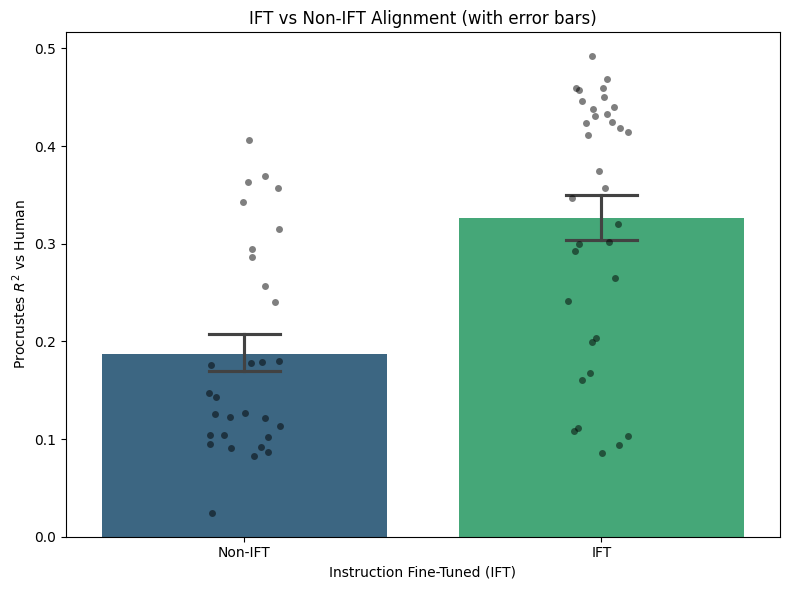

: 

: 

: 

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# --- Split groups ---
ift_group = r2_df[r2_df["IFT"] == 1]["r2"]
nonift_group = r2_df[r2_df["IFT"] == 0]["r2"]

# --- T-test ---
t_stat, p_val = ttest_ind(ift_group, nonift_group, equal_var=False)
print(f"T-test: t = {t_stat:.3f}, p = {p_val:.4f}")
print(f"Mean R² (IFT=1): {ift_group.mean():.3f}")
print(f"Mean R² (IFT=0): {nonift_group.mean():.3f}")

# --- Plot means with error bars ---
plt.figure(figsize=(8,6))
sns.barplot(data=r2_df, x="IFT", y="r2", ci=68, capsize=0.2, palette="viridis")
sns.stripplot(data=r2_df, x="IFT", y="r2", color="black", alpha=0.5, jitter=True)

plt.xticks([0, 1], ["Non-IFT", "IFT"])
plt.xlabel("Instruction Fine-Tuned (IFT)")
plt.ylabel("Procrustes $R^2$ vs Human")
plt.title("IFT vs Non-IFT Alignment (with error bars)")
plt.tight_layout()
plt.show()


model_triplet_output_OLMo-2-1124-7B-DPO_THINGS_embedding: shape=(128, 30)
model_triplet_output_OLMo-2-1124-7B-SFT_THINGS_embedding: shape=(128, 30)
model_triplet_output_OLMo-2-1124-7B-Instruct_THINGS_embedding: shape=(128, 30)
model_triplet_output_OLMo-2-1124-7B_THINGS_embedding: shape=(128, 30)


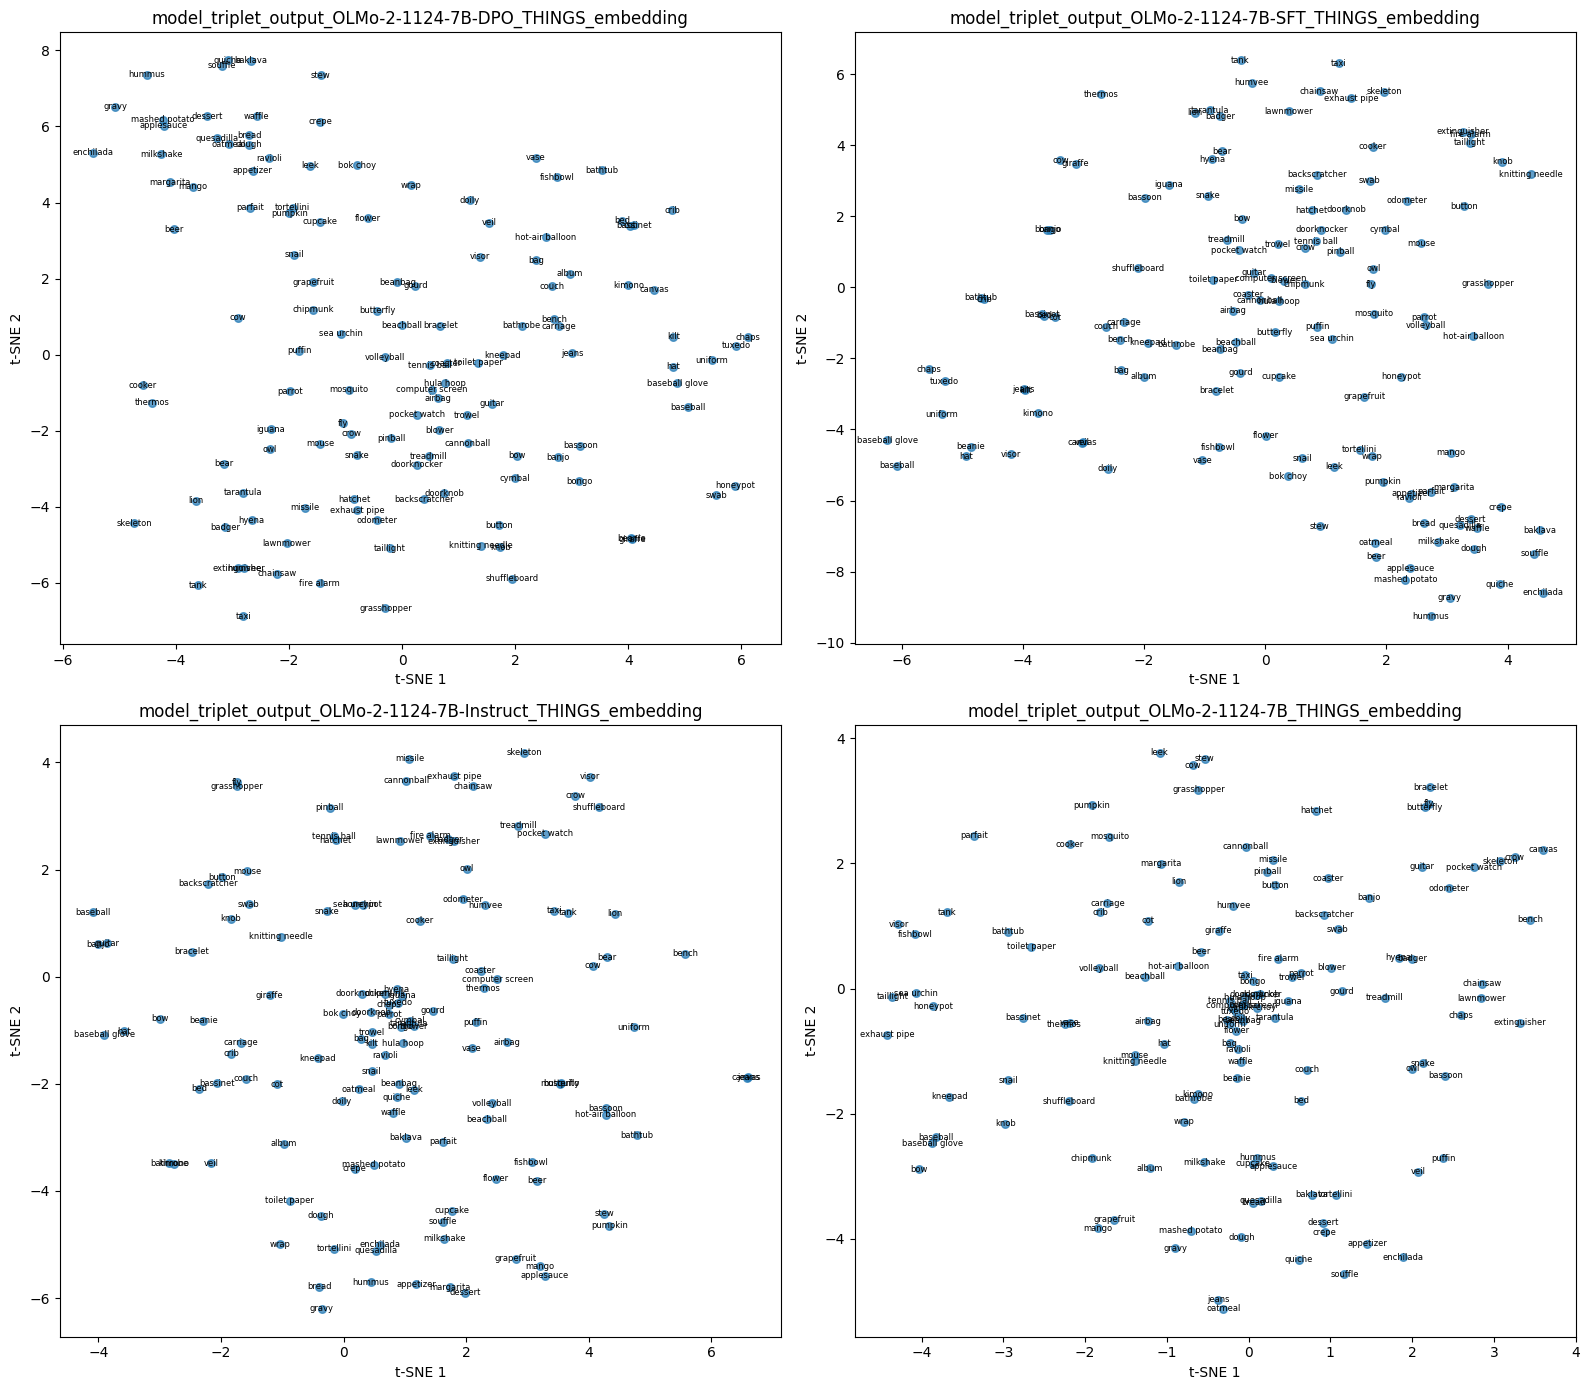

: 

: 

: 

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Keys for the OLMo variants
keys = [
    "model_triplet_output_OLMo-2-1124-7B-DPO_THINGS_embedding",
    "model_triplet_output_OLMo-2-1124-7B-SFT_THINGS_embedding",
    "model_triplet_output_OLMo-2-1124-7B-Instruct_THINGS_embedding",
    "model_triplet_output_OLMo-2-1124-7B_THINGS_embedding"
]

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

for ax, key in zip(axes, keys):
    df_model = embeddings_set[key]

    # Extract embedding dims
    dims = _dim_cols(df_model)
    X = df_model[dims].to_numpy()

    # Keep finite rows
    mask = np.isfinite(X).all(axis=1)
    X = X[mask]
    items = df_model.loc[mask, "item"].tolist()

    print(f"{key}: shape={X.shape}")

    # Run t-SNE
    tsne = TSNE(n_components=2, metric="euclidean", perplexity=30, random_state=42)
    X_embedded = tsne.fit_transform(X)

    # Scatterplot
    ax.scatter(X_embedded[:, 0], X_embedded[:, 1], s=30, alpha=0.7)

    # Add item labels
    for i, label in enumerate(items):
        ax.text(X_embedded[i, 0], X_embedded[i, 1], label, fontsize=6, ha="center", va="center")

    ax.set_title(key, fontsize=12)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")

plt.tight_layout()
plt.show()


In [ ]:
reasoning_models = [m for m in r2_df["model"] if "reasoning" in m.lower()]
print(reasoning_models)


['model_triplet_output_phi-4-mini-reasoning_THINGS_embedding']


: 

: 

: 

In [ ]:
# --- Architecture mapping (HF + official docs) ---
architecture_map = {
    # Qwen / Qwen2 / Qwen2.5 (causal decoder-only)
    "model_triplet_output_qwen25-14b-instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_qwen25-7b-instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_qwen2-7b-instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_qwen25-14b_THINGS_embedding": "decoder-only",
    "model_triplet_output_qwen-14b_THINGS_embedding": "decoder-only",
    "model_triplet_output_qwen-14b-chat_THINGS_embedding": "decoder-only",
    "model_triplet_output_qwen2-7b_THINGS_embedding": "decoder-only",
    "model_triplet_output_qwen25-7b_THINGS_embedding": "decoder-only",

    # Phi family (decoder-only)
    "model_triplet_output_Phi-3-medium-4k-instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_Phi-3.5-mini-instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_phi-3-medium-128k-instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_phi-3-mini-128k-instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_phi-1_5_THINGS_embedding": "decoder-only",
    "model_triplet_output_phi-4-mini-reasoning_THINGS_embedding": "decoder-only",

    # Gemma 2 / Gemma 3 (decoder-only)
    "model_triplet_output_gemma-2-9b-it_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-2-27b-it_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-2-2b-it_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-2-27b_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-2-9b_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-2-2b_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-3-27b-it_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-3-12b-it_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-3-4b-it_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-3-4b-pt_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-3-27b-pt_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-3-12b-pt_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-3-270m_THINGS_embedding": "decoder-only",
    "model_triplet_output_gemma-3-270m-it_THINGS_embedding": "decoder-only",

    # Llama (decoder-only)
    "model_triplet_output_Llama-3.1-8B-Instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_llama2-13b-chat_THINGS_embedding": "decoder-only",
    "model_triplet_output_llama2-7b-chat_THINGS_embedding": "decoder-only",
    "model_triplet_output_llama2-7b_THINGS_embedding": "decoder-only",
    "model_triplet_output_llama2-13b_THINGS_embedding": "decoder-only",

    # OLMo 2 + AMD OLMo (decoder-only)
    "model_triplet_output_OLMo-2-0325-32B-Instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_OLMo-2-1124-13B-Instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_OLMo-2-1124-7B-DPO_THINGS_embedding": "decoder-only",
    "model_triplet_output_OLMo-2-1124-7B-SFT_THINGS_embedding": "decoder-only",
    "model_triplet_output_OLMo-2-1124-7B_THINGS_embedding": "decoder-only",
    "model_triplet_output_OLMo-2-0425-1B_THINGS_embedding": "decoder-only",
    "model_triplet_output_OLMo-2-0425-1B-SFT_THINGS_embedding": "decoder-only",
    "model_triplet_output_AMD-OLMo-1B_THINGS_embedding": "decoder-only",
    "model_triplet_output_AMD-OLMo-1B-SFT-DPO_THINGS_embedding": "decoder-only",

    # Falcon (decoder-only)
    "model_triplet_output_Falcon3-10B-Base_THINGS_embedding": "decoder-only",
    "model_triplet_output_Falcon3-3B-Base_THINGS_embedding": "decoder-only",
    "model_triplet_output_falcon-7b_THINGS_embedding": "decoder-only",
    "model_triplet_output_falcon-7b-instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_falcon-11b_THINGS_embedding": "decoder-only",

    # Orca 2 (finetune of Llama 2 → decoder-only)
    "model_triplet_output_orca-2-13b_THINGS_embedding": "decoder-only",
    "model_triplet_output_orca-2-7b_THINGS_embedding": "decoder-only",

    # FLAN-T5 (encoder–decoder)
    "model_triplet_output_flan-t5-xxl_THINGS_embedding": "encoder-decoder",
    "model_triplet_output_flan-t5-xl_THINGS_embedding": "encoder-decoder",
    "model_triplet_output_flan-t5-large_THINGS_embedding": "encoder-decoder",
    "model_triplet_output_flan-t5-large_THINGS copy_embedding": "encoder-decoder",
    "model_triplet_output_flan-t5-small_THINGS_embedding": "encoder-decoder",

    # Yi (decoder-only)
    "model_triplet_output_Yi-9B_THINGS_embedding": "decoder-only",

    # Eleuther & Open-weights
    "model_triplet_output_gpt-j-6b_THINGS_embedding": "decoder-only",

    # GPT-OSS-20B (Mixture-of-Experts)
    "model_triplet_output_gpt-oss-20b_THINGS_embedding": "moe",

    "model_triplet_output_mamba-1.4b-hf_THINGS_embeddings":"mamba",
    "model_triplet_output_t5-3b_THINGS_embedding":"encoder-decoder",
    "model_triplet_output_t5-11b_THINGS_embedding":"encoder-decoder",
    "model_triplet_output_Instella-3B-Instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_Instella-3B-SFT_THINGS_embedding": "decoder-only",
    "model_triplet_output_Instella-3B_THINGS_embedding": "decoder-only",
    "model_triplet_output_OLMo-2-1124-7B-Instruct_THINGS_embedding": "decoder-only",
    "model_triplet_output_mamba-1.4b-hf_THINGS_embedding": "ssm"
}

# --- Merge into your results DF ---
r2_df["ARCH"] = r2_df["model"].map(architecture_map).fillna("unknown")

# Sanity check: list any models we didn't map
missing = sorted(set(r2_df.loc[r2_df["ARCH"] == "unknown", "model"]))
print("Unmapped models:", missing if missing else "None")
print(r2_df[["model", "ARCH"]].head(10))


Unmapped models: None
                                                model          ARCH
58  model_triplet_output_qwen25-14b-instruct_THING...  decoder-only
55  model_triplet_output_Phi-3-medium-4k-instruct_...  decoder-only
38  model_triplet_output_gemma-3-27b-it_THINGS_emb...  decoder-only
27  model_triplet_output_qwen25-7b-instruct_THINGS...  decoder-only
56  model_triplet_output_Phi-3.5-mini-instruct_THI...  decoder-only
19  model_triplet_output_phi-3-medium-128k-instruc...  decoder-only
25  model_triplet_output_qwen2-7b-instruct_THINGS_...  decoder-only
4   model_triplet_output_gemma-2-9b-it_THINGS_embe...  decoder-only
7   model_triplet_output_gemma-3-4b-it_THINGS_embe...  decoder-only
6   model_triplet_output_gemma-2-27b-it_THINGS_emb...  decoder-only


: 

: 

: 

            sum_sq    df         F    PR(>F)
C(ARCH)   0.120481   3.0  2.201279  0.097189
Residual  1.094644  60.0       NaN       NaN


/tmp/ipykernel_3698680/3461098849.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=r2_df, x="ARCH", y="r2", ci=95, capsize=0.2, palette="viridis")
/tmp/ipykernel_3698680/3461098849.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=r2_df, x="ARCH", y="r2", ci=95, capsize=0.2, palette="viridis")


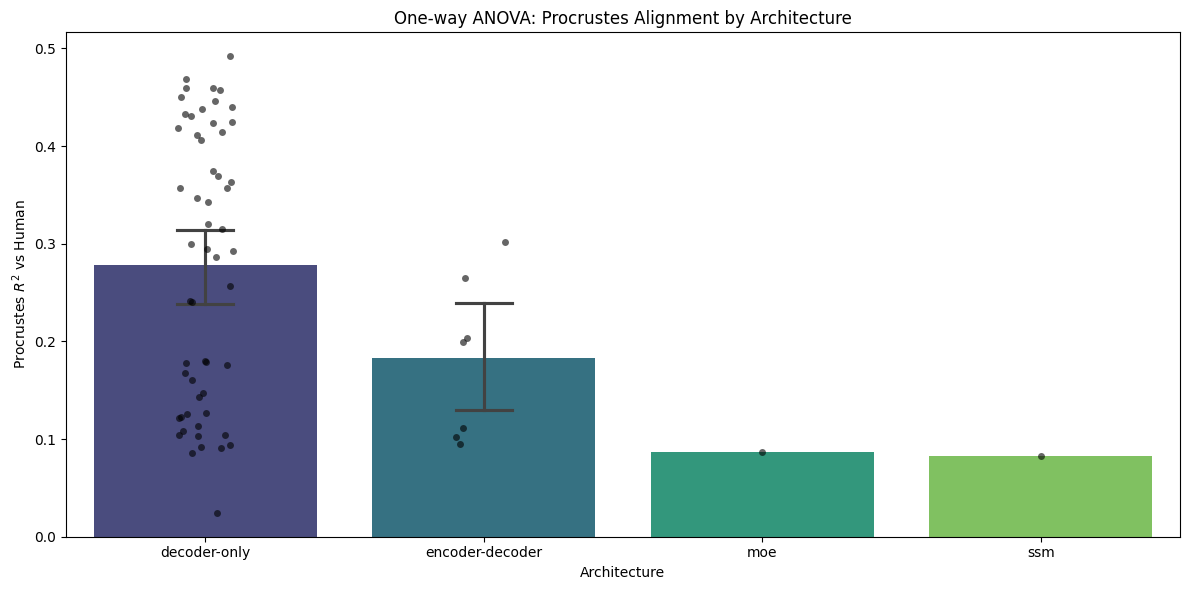

: 

: 

: 

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns

# --- One-way ANOVA ---
model = smf.ols("r2 ~ C(ARCH)", data=r2_df).fit()
anova_res = anova_lm(model, typ=2)
print(anova_res)

# --- Plot: group means with error bars and all points ---
plt.figure(figsize=(12,6))
sns.barplot(data=r2_df, x="ARCH", y="r2", ci=95, capsize=0.2, palette="viridis")
sns.stripplot(data=r2_df, x="ARCH", y="r2", color="black", alpha=0.6, jitter=True)

plt.xlabel("Architecture")
plt.ylabel("Procrustes $R^2$ vs Human")
plt.title("One-way ANOVA: Procrustes Alignment by Architecture")
plt.tight_layout()
plt.show()


⚠️ No param size parsed for: ['model_triplet_output_phi-1_5_THINGS_embedding']
                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     10.47
Date:                Fri, 12 Sep 2025   Prob (F-statistic):            0.00196
Time:                        10:33:32   Log-Likelihood:                 40.141
No. Observations:                  63   AIC:                            -76.28
Df Residuals:                      61   BIC:                            -72.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

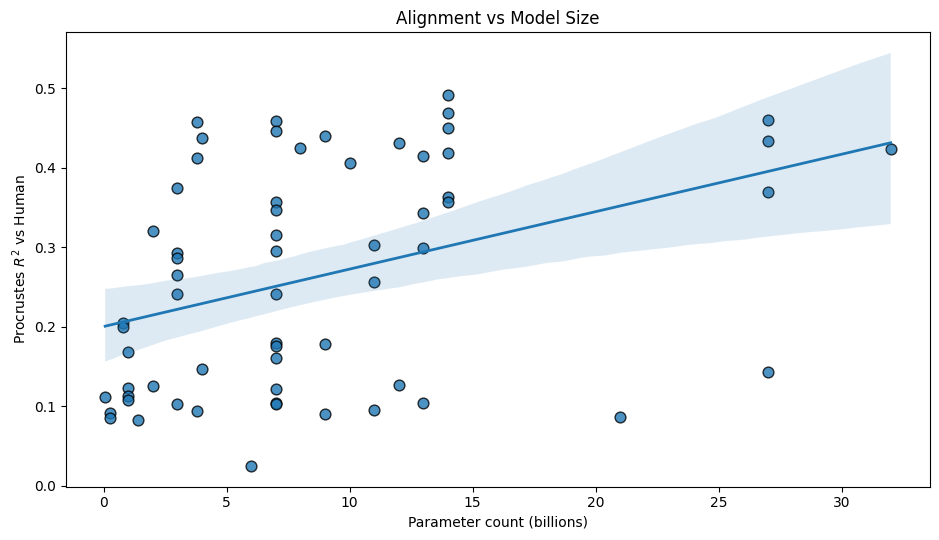

: 

: 

: 

In [ ]:
# Param-size mapping + regression vs alignment (R^2)

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Manual overrides / families with well-known sizes (billions) ---
# Notes:
# - FLAN-T5 sizes follow T5: small≈0.06B, large≈0.77B, XL=3B, XXL=11B
# - Phi-3 medium = 14B; Phi-3/3.5/4 mini = 3.8B
# - GPT-OSS-20B model card lists ~21B total params (3.6B active MoE)
SPECIAL_PARAM_B = {
    "phi-3-medium": 14.0,
    "phi-3-medium-4k": 14.0,
    "phi-3-medium-128k": 14.0,
    "phi-3-mini": 3.8,
    "phi-3.5-mini": 3.8,
    "phi-4-mini": 3.8,

    "flan-t5-small": 0.06,
    "flan-t5-large": 0.77,
    "flan-t5-xl": 3.0,
    "flan-t5-xxl": 11.0,
    "t5-3b": 3.0,
    "t5-11b": 11.0,

    "gpt-j-6b": 6.0,
    "gpt-oss-20b": 21.0,  # per model card (named "20b", total ~21B)

    "mamba-1.4b-hf": 1.4,
    "mamba-1.4b": 1.4,

    "yi-9b": 9.0,
}

def infer_params_b(name: str) -> float:
    """Infer parameter count in billions from the model name, with manual overrides."""
    s = name.lower().replace("_", "-")
    # manual overrides by substring
    for k, v in SPECIAL_PARAM_B.items():
        if k in s:
            return v
    # general patterns like "-7b-", "-27b", "-270m-"
    m = re.search(r'(\d+(?:\.\d+)?)\s*b', s)
    if m:
        return float(m.group(1))
    m = re.search(r'(\d+(?:\.\d+)?)\s*m', s)
    if m:
        return float(m.group(1)) / 1000.0
    return np.nan

# Add PARAM_B
r2_df["PARAM_B"] = r2_df["model"].apply(infer_params_b)

# Show any models we couldn't infer
missing_params = r2_df[r2_df["PARAM_B"].isna()]["model"].tolist()
if missing_params:
    print("⚠️ No param size parsed for:", missing_params)

# --- Linear regression: PARAM_B (X) -> r2 (Y) ---
data = r2_df.dropna(subset=["PARAM_B", "r2"]).copy()

X = sm.add_constant(data["PARAM_B"])
y = data["r2"]
ols = sm.OLS(y, X).fit()

print(ols.summary())

# --- Plot with line of best fit ---
plt.figure(figsize=(9.5, 5.5))
sns.regplot(
    data=data, x="PARAM_B", y="r2",
    scatter_kws={"s": 60, "alpha": 0.8, "edgecolors": "black"},
    line_kws={"linewidth": 2}
)
plt.xlabel("Parameter count (billions)")
plt.ylabel("Procrustes $R^2$ vs Human")
plt.title("Alignment vs Model Size")
plt.tight_layout()
plt.show()


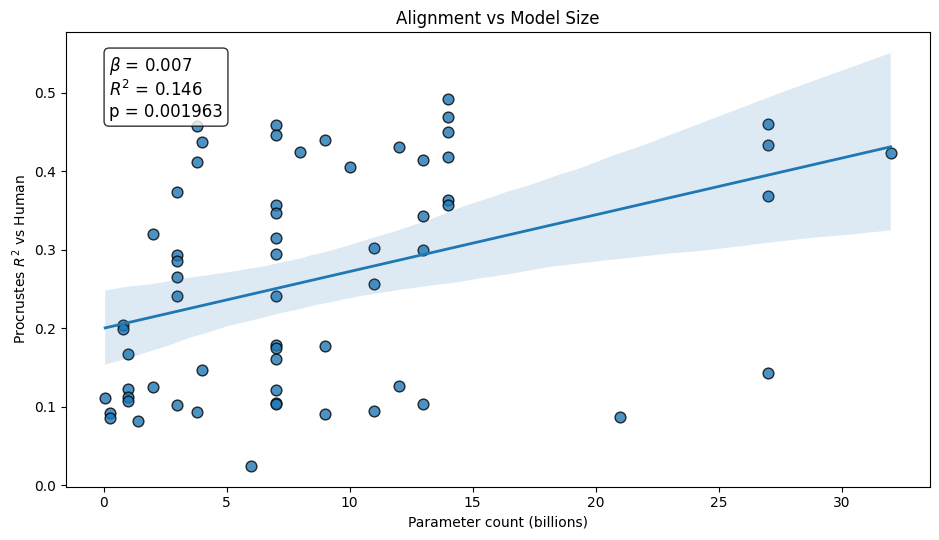

: 

: 

: 

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# --- Linear regression setup (reuse PARAM_B mapping from before) ---
data = r2_df.dropna(subset=["PARAM_B", "r2"]).copy()
X = sm.add_constant(data["PARAM_B"])
y = data["r2"]
ols = sm.OLS(y, X).fit()

beta = ols.params["PARAM_B"]
r2_val = ols.rsquared
p_val = ols.pvalues["PARAM_B"]

# --- Plot with LOBF + annotation ---
plt.figure(figsize=(9.5, 5.5))
sns.regplot(
    data=data, x="PARAM_B", y="r2",
    scatter_kws={"s": 60, "alpha": 0.8, "edgecolors": "black"},
    line_kws={"linewidth": 2}
)
plt.xlabel("Parameter count (billions)")
plt.ylabel("Procrustes $R^2$ vs Human")
plt.title("Alignment vs Model Size")

# Annotate regression stats
plt.text(
    0.05, 0.95,
    f"$\\beta$ = {beta:.3f}\n$R^2$ = {r2_val:.3f}\np = {p_val:.4g}",
    transform=plt.gca().transAxes,
    verticalalignment="top",
    fontsize=12,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

plt.tight_layout()
plt.show()


In [ ]:
# --- Add FAMILY mapping based on model name substrings ---
import re

# Optional manual overrides for any tricky names (exact r2_df["model"] keys)
FAMILY_OVERRIDES = {
    # "model_triplet_output_some-weird-name_THINGS_embedding": "YourFamily",
}

FAMILY_PATTERNS = [
    ("Llama",        ["llama3", "llama-3", "llama-3.1", "llama2", "llama-2", "llama"]),
    ("Gemma",        ["gemma-3", "gemma-2", "gemma"]),
    ("Qwen",         ["qwen25", "qwen2.5", "qwen2", "qwen-14b", "qwen"]),
    ("Phi",          ["phi-4", "phi-3.5", "phi-3", "phi-1_5", "phi-1.5", "phi"]),
    ("OLMo",         ["olmo-2", "amd-olmo", "olmo"]),
    ("Instella",     ["instella"]),
    ("Falcon",       ["falcon3", "falcon-7b", "falcon-11b", "falcon"]),
    ("T5/FLAN-T5",   ["flan-t5", "t5-3b", "t5-11b", "t5-"]),
    ("Yi",           ["yi-"]),
    ("GPT-J",        ["gpt-j"]),
    ("GPT-OSS",      ["gpt-oss"]),
    ("Orca-2",       ["orca-2"]),
    ("Mamba",        ["mamba"]),
]

def infer_family(model_name: str) -> str:
    # manual override first
    if model_name in FAMILY_OVERRIDES:
        return FAMILY_OVERRIDES[model_name]

    s = model_name.lower().replace("_", "-")
    # tighten common boundaries (avoid 'flan' vs 'falcon' collisions)
    s = re.sub(r"-+", "-", s)

    for family, kws in FAMILY_PATTERNS:
        if any(kw in s for kw in kws):
            return family
    return "Other/Unknown"

r2_df["FAMILY"] = r2_df["model"].apply(infer_family)

# sanity check: list any that fell through
unfam = sorted(set(r2_df.loc[r2_df["FAMILY"] == "Other/Unknown", "model"]))
print("Unassigned families:", unfam if unfam else "None")

# peek
r2_df[["model", "FAMILY"]].head(12)


Unassigned families: None


model FAMILY
58  model_triplet_output_qwen25-14b-instruct_THING...   Qwen
55  model_triplet_output_Phi-3-medium-4k-instruct_...    Phi
38  model_triplet_output_gemma-3-27b-it_THINGS_emb...  Gemma
27  model_triplet_output_qwen25-7b-instruct_THINGS...   Qwen
56  model_triplet_output_Phi-3.5-mini-instruct_THI...    Phi
19  model_triplet_output_phi-3-medium-128k-instruc...    Phi
25  model_triplet_output_qwen2-7b-instruct_THINGS_...   Qwen
4   model_triplet_output_gemma-2-9b-it_THINGS_embe...  Gemma
7   model_triplet_output_gemma-3-4b-it_THINGS_embe...  Gemma
6   model_triplet_output_gemma-2-27b-it_THINGS_emb...  Gemma
9   model_triplet_output_gemma-3-12b-it_THINGS_emb...  Gemma
44  model_triplet_output_Llama-3.1-8B-Instruct_THI...  Llama

: 

: 

: 

             sum_sq    df         F    PR(>F)
C(FAMILY)  0.346706  12.0  1.696764  0.095257
Residual   0.868419  51.0       NaN       NaN


/tmp/ipykernel_3698680/3028032100.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=r2_df, x="FAMILY", y="r2", ci=95, capsize=0.2, order=order, palette="viridis")
/tmp/ipykernel_3698680/3028032100.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=r2_df, x="FAMILY", y="r2", ci=95, capsize=0.2, order=order, palette="viridis")


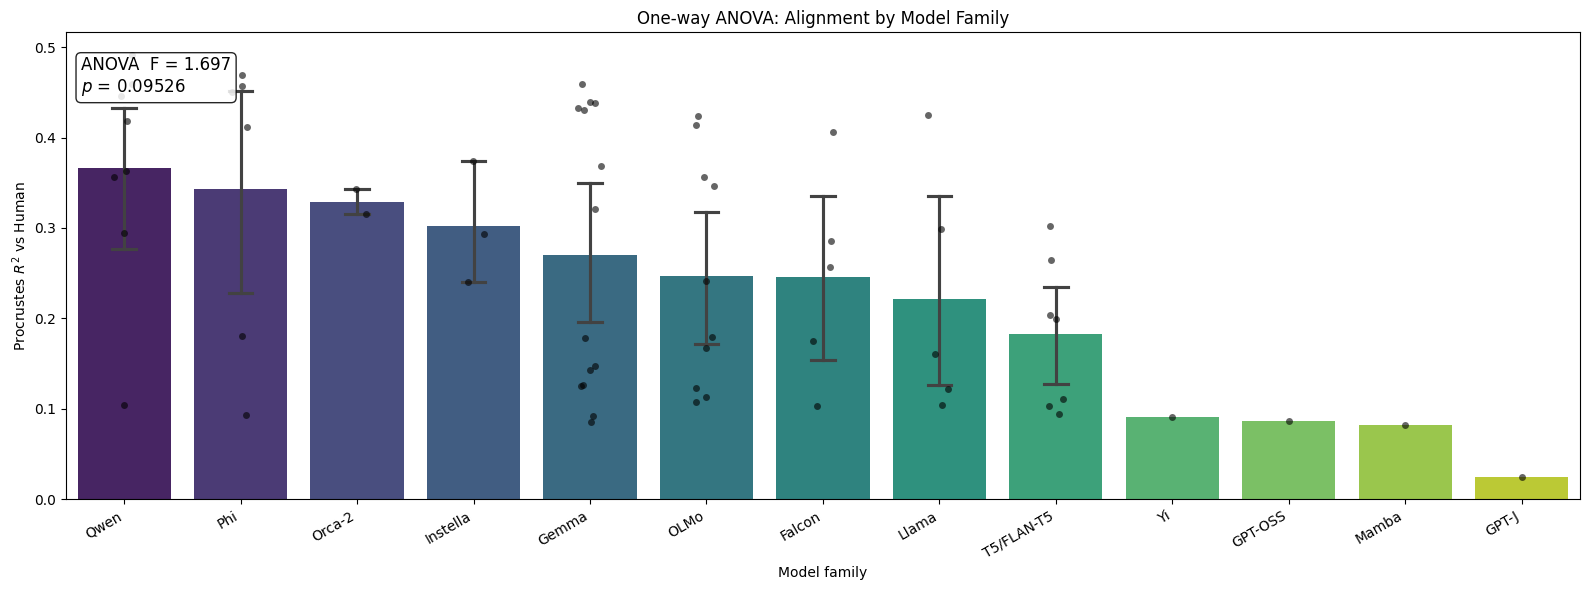

: 

: 

: 

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- One-way ANOVA: r2 ~ FAMILY ---
model = smf.ols("r2 ~ C(FAMILY)", data=r2_df).fit()
anova_res = anova_lm(model, typ=2)
print(anova_res)

# Extract stats for annotation
F_val = anova_res.loc["C(FAMILY)", "F"]
p_val = anova_res.loc["C(FAMILY)", "PR(>F)"]

# Order families by mean R^2 for nicer plotting
order = (
    r2_df.groupby("FAMILY")["r2"]
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# --- Plot: means with 95% CI + all points ---
plt.figure(figsize=(16, 6))
sns.barplot(data=r2_df, x="FAMILY", y="r2", ci=95, capsize=0.2, order=order, palette="viridis")
sns.stripplot(data=r2_df, x="FAMILY", y="r2", order=order, color="black", alpha=0.6, jitter=True)

plt.xlabel("Model family")
plt.ylabel("Procrustes $R^2$ vs Human")
plt.title("One-way ANOVA: Alignment by Model Family")

# Annotate ANOVA stats on the plot
ax = plt.gca()
plt.text(
    0.01, 0.95,
    f"ANOVA  F = {F_val:.3f}\n$p$ = {p_val:.4g}",
    transform=ax.transAxes,
    va="top",
    fontsize=12,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.85)
)

plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


Group sizes -> Text-only: 58 | Multimodal: 6
Welch t-test: t=-0.463, p=6.608e-01


/tmp/ipykernel_3698680/365572292.py:109: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=r2_df, x="MODALITY", y="r2", ci=95, estimator=np.mean, edgecolor="black")


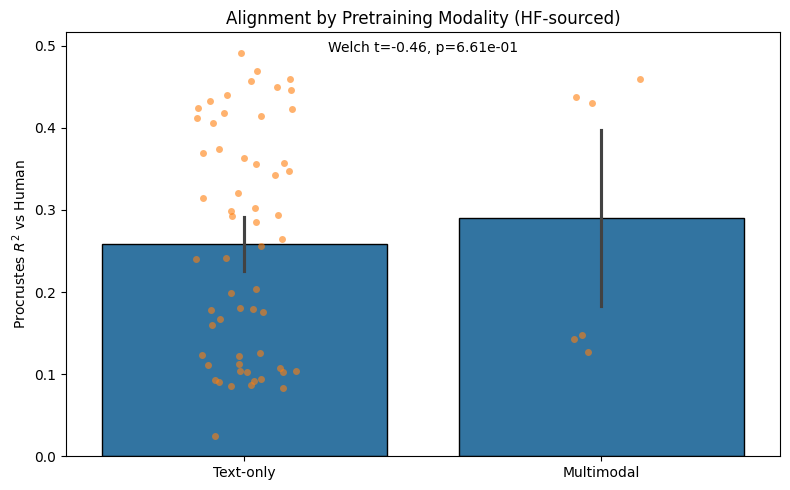

: 

: 

: 

In [ ]:
# --- HF-derived modality mapping ---
modality_map = {
    # Qwen / Qwen2 / Qwen2.5 (text-only; VL is separate)
    "model_triplet_output_qwen25-14b-instruct_THINGS_embedding": "Text-only",
    "model_triplet_output_qwen25-7b-instruct_THINGS_embedding": "Text-only",
    "model_triplet_output_qwen2-7b-instruct_THINGS_embedding": "Text-only",
    "model_triplet_output_qwen25-14b_THINGS_embedding": "Text-only",
    "model_triplet_output_qwen-14b_THINGS_embedding": "Text-only",
    "model_triplet_output_qwen-14b-chat_THINGS_embedding": "Text-only",
    "model_triplet_output_qwen2-7b_THINGS_embedding": "Text-only",
    "model_triplet_output_qwen25-7b_THINGS_embedding": "Text-only",

    # Phi family (text-only; vision models are separate "vision"/"multimodal" repos)
    "model_triplet_output_Phi-3-medium-4k-instruct_THINGS_embedding": "Text-only",
    "model_triplet_output_Phi-3.5-mini-instruct_THINGS_embedding": "Text-only",
    "model_triplet_output_phi-3-medium-128k-instruct_THINGS_embedding": "Text-only",
    "model_triplet_output_phi-3-mini-128k-instruct_THINGS_embedding": "Text-only",
    "model_triplet_output_phi-1_5_THINGS_embedding": "Text-only",
    "model_triplet_output_phi-4-mini-reasoning_THINGS_embedding": "Text-only",

    # Gemma 2 (text-only)
    "model_triplet_output_gemma-2-9b-it_THINGS_embedding": "Text-only",
    "model_triplet_output_gemma-2-27b-it_THINGS_embedding": "Text-only",
    "model_triplet_output_gemma-2-2b-it_THINGS_embedding": "Text-only",
    "model_triplet_output_gemma-2-27b_THINGS_embedding": "Text-only",
    "model_triplet_output_gemma-2-9b_THINGS_embedding": "Text-only",
    "model_triplet_output_gemma-2-2b_THINGS_embedding": "Text-only",

    # Gemma 3: 4B/12B/27B are multimodal; <=1B (and 270M) treat as text-only per official table
    "model_triplet_output_gemma-3-27b-it_THINGS_embedding": "Multimodal",
    "model_triplet_output_gemma-3-4b-it_THINGS_embedding": "Multimodal",
    "model_triplet_output_gemma-3-12b-it_THINGS_embedding": "Multimodal",
    "model_triplet_output_gemma-3-4b-pt_THINGS_embedding": "Multimodal",
    "model_triplet_output_gemma-3-27b-pt_THINGS_embedding": "Multimodal",
    "model_triplet_output_gemma-3-12b-pt_THINGS_embedding": "Multimodal",
    "model_triplet_output_gemma-3-270m_THINGS_embedding": "Text-only",
    "model_triplet_output_gemma-3-270m-it_THINGS_embedding": "Text-only",

    # Llama 3.1 / Llama 2 (text-only)
    "model_triplet_output_Llama-3.1-8B-Instruct_THINGS_embedding": "Text-only",
    "model_triplet_output_llama2-13b-chat_THINGS_embedding": "Text-only",
    "model_triplet_output_llama2-7b-chat_THINGS_embedding": "Text-only",
    "model_triplet_output_llama2-7b_THINGS_embedding": "Text-only",
    "model_triplet_output_llama2-13b_THINGS_embedding": "Text-only",

    # OLMo 2 + AMD OLMo (text-only)
    "model_triplet_output_OLMo-2-0325-32B-Instruct_THINGS_embedding": "Text-only",
    "model_triplet_output_OLMo-2-1124-13B-Instruct_THINGS_embedding": "Text-only",
    "model_triplet_output_OLMo-2-1124-7B-DPO_THINGS_embedding": "Text-only",
    "model_triplet_output_OLMo-2-1124-7B-SFT_THINGS_embedding": "Text-only",
    "model_triplet_output_OLMo-2-1124-7B_THINGS_embedding": "Text-only",
    "model_triplet_output_OLMo-2-0425-1B_THINGS_embedding": "Text-only",
    "model_triplet_output_OLMo-2-0425-1B-SFT_THINGS_embedding": "Text-only",
    "model_triplet_output_AMD-OLMo-1B_THINGS_embedding": "Text-only",
    "model_triplet_output_AMD-OLMo-1B-SFT-DPO_THINGS_embedding": "Text-only",

    # Falcon (text-only; VLM is a different repo)
    "model_triplet_output_Falcon3-10B-Base_THINGS_embedding": "Text-only",
    "model_triplet_output_Falcon3-3B-Base_THINGS_embedding": "Text-only",
    "model_triplet_output_falcon-11b_THINGS_embedding": "Text-only",
    "model_triplet_output_falcon-7b_THINGS_embedding": "Text-only",
    "model_triplet_output_falcon-7b-instruct_THINGS_embedding": "Text-only",

    # Orca 2 (finetune of Llama 2 → text-only)
    "model_triplet_output_orca-2-13b_THINGS_embedding": "Text-only",
    "model_triplet_output_orca-2-7b_THINGS_embedding": "Text-only",

    # FLAN-T5 (encoder–decoder text)
    "model_triplet_output_flan-t5-xxl_THINGS_embedding": "Text-only",
    "model_triplet_output_flan-t5-xl_THINGS_embedding": "Text-only",
    "model_triplet_output_flan-t5-large_THINGS_embedding": "Text-only",
    "model_triplet_output_flan-t5-large_THINGS copy_embedding": "Text-only",
    "model_triplet_output_flan-t5-small_THINGS_embedding": "Text-only",

    # Yi
    "model_triplet_output_Yi-9B_THINGS_embedding": "Text-only",

    # Eleuther & Open-weights
    "model_triplet_output_gpt-j-6b_THINGS_embedding": "Text-only",

    # OpenAI GPT-OSS (text-only MoE)
    "model_triplet_output_gpt-oss-20b_THINGS_embedding": "Text-only",

    # Instella (AMD) — text generation LLMs
    "model_triplet_output_Instella-3B-Instruct_THINGS_embedding": "Text-only",
    "model_triplet_output_Instella-3B-SFT_THINGS_embedding": "Text-only",
    "model_triplet_output_Instella-3B_THINGS_embedding": "Text-only",
}

# Add to your results DF
r2_df["MODALITY"] = r2_df["model"].map(modality_map).fillna("Text-only")

# Welch's t-test Text-only vs Multimodal
from scipy.stats import ttest_ind
text_vals = r2_df.loc[r2_df["MODALITY"]=="Text-only", "r2"].dropna()
mm_vals   = r2_df.loc[r2_df["MODALITY"]=="Multimodal", "r2"].dropna()

print(f"Group sizes -> Text-only: {len(text_vals)} | Multimodal: {len(mm_vals)}")
if len(text_vals) >= 2 and len(mm_vals) >= 2:
    t_stat, p_val = ttest_ind(text_vals, mm_vals, equal_var=False)
    print(f"Welch t-test: t={t_stat:.3f}, p={p_val:.3e}")
else:
    print("Not enough models per group for a reliable t-test.")

# Plot: group means with 95% CI + points
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
ax = sns.barplot(data=r2_df, x="MODALITY", y="r2", ci=95, estimator=np.mean, edgecolor="black")
sns.stripplot(data=r2_df, x="MODALITY", y="r2", alpha=0.6, jitter=0.15, dodge=False)
ax.set_ylabel("Procrustes $R^2$ vs Human")
ax.set_xlabel("")
ax.set_title("Alignment by Pretraining Modality (HF-sourced)")
if len(text_vals) >= 2 and len(mm_vals) >= 2:
    ax.text(0.5, 0.98, f"Welch t={t_stat:.2f}, p={p_val:.2e}", ha="center", va="top", transform=ax.transAxes)
plt.tight_layout()
plt.show()


ANOVA (R^2 ~ activation): F = 1.677, p = 0.168
Group sizes: {'GEGLU': 21, 'GELU': 5, 'GELU_new': 2, 'SwiGLU': 26, 'SwiGLU/SiLU': 8}


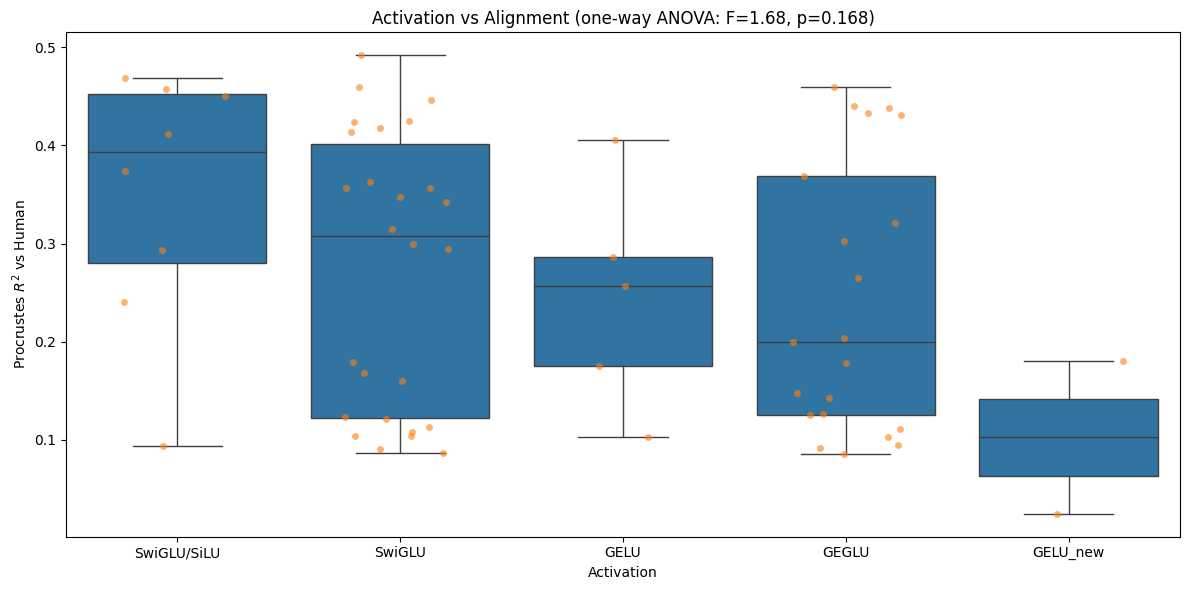

: 

: 

: 

In [ ]:
# --- Activation mapping from model cards / docs (see notes above) ---
activation_map = {
    # Qwen / Qwen2 / Qwen2.5  → SwiGLU
    "model_triplet_output_qwen25-14b-instruct_THINGS_embedding": "SwiGLU",
    "model_triplet_output_qwen25-7b-instruct_THINGS_embedding": "SwiGLU",
    "model_triplet_output_qwen2-7b-instruct_THINGS_embedding": "SwiGLU",
    "model_triplet_output_qwen25-14b_THINGS_embedding": "SwiGLU",
    "model_triplet_output_qwen-14b_THINGS_embedding": "SwiGLU",
    "model_triplet_output_qwen-14b-chat_THINGS_embedding": "SwiGLU",
    "model_triplet_output_qwen2-7b_THINGS_embedding": "SwiGLU",
    "model_triplet_output_qwen25-7b_THINGS_embedding": "SwiGLU",

    # Phi family
    "model_triplet_output_Phi-3-medium-4k-instruct_THINGS_embedding": "SwiGLU/SiLU",
    "model_triplet_output_Phi-3.5-mini-instruct_THINGS_embedding": "SwiGLU/SiLU",
    "model_triplet_output_phi-3-medium-128k-instruct_THINGS_embedding": "SwiGLU/SiLU",
    "model_triplet_output_phi-3-mini-128k-instruct_THINGS_embedding": "SwiGLU/SiLU",
    "model_triplet_output_phi-1_5_THINGS_embedding": "GELU_new",
    "model_triplet_output_phi-4-mini-reasoning_THINGS_embedding": "SwiGLU/SiLU",

    # Gemma 2 / Gemma 3 → GEGLU
    "model_triplet_output_gemma-2-9b-it_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-2-27b-it_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-2-2b-it_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-2-27b_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-2-9b_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-2-2b_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-3-27b-it_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-3-12b-it_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-3-4b-it_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-3-4b-pt_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-3-27b-pt_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-3-12b-pt_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-3-270m_THINGS_embedding": "GEGLU",
    "model_triplet_output_gemma-3-270m-it_THINGS_embedding": "GEGLU",

    # Llama (2 / 3.x) → SwiGLU
    "model_triplet_output_Llama-3.1-8B-Instruct_THINGS_embedding": "SwiGLU",
    "model_triplet_output_llama2-13b-chat_THINGS_embedding": "SwiGLU",
    "model_triplet_output_llama2-7b-chat_THINGS_embedding": "SwiGLU",
    "model_triplet_output_llama2-7b_THINGS_embedding": "SwiGLU",
    "model_triplet_output_llama2-13b_THINGS_embedding": "SwiGLU",

    # OLMo 2 / AMD OLMo → SwiGLU
    "model_triplet_output_OLMo-2-0325-32B-Instruct_THINGS_embedding": "SwiGLU",
    "model_triplet_output_OLMo-2-1124-13B-Instruct_THINGS_embedding": "SwiGLU",
    "model_triplet_output_OLMo-2-1124-7B-DPO_THINGS_embedding": "SwiGLU",
    "model_triplet_output_OLMo-2-1124-7B-SFT_THINGS_embedding": "SwiGLU",
    "model_triplet_output_OLMo-2-1124-7B_THINGS_embedding": "SwiGLU",
    "model_triplet_output_OLMo-2-0425-1B_THINGS_embedding": "SwiGLU",
    "model_triplet_output_OLMo-2-0425-1B-SFT_THINGS_embedding": "SwiGLU",
    "model_triplet_output_AMD-OLMo-1B_THINGS_embedding": "SwiGLU",
    "model_triplet_output_AMD-OLMo-1B-SFT-DPO_THINGS_embedding": "SwiGLU",

    # Falcon → GELU
    "model_triplet_output_Falcon3-10B-Base_THINGS_embedding": "GELU",
    "model_triplet_output_Falcon3-3B-Base_THINGS_embedding": "GELU",
    "model_triplet_output_falcon-7b_THINGS_embedding": "GELU",
    "model_triplet_output_falcon-7b-instruct_THINGS_embedding": "GELU",
    "model_triplet_output_falcon-11b_THINGS_embedding": "GELU",

    # Orca 2 (Llama 2 fine-tunes) → SwiGLU
    "model_triplet_output_orca-2-13b_THINGS_embedding": "SwiGLU",
    "model_triplet_output_orca-2-7b_THINGS_embedding": "SwiGLU",

    # FLAN-T5 → GEGLU
    "model_triplet_output_flan-t5-xxl_THINGS_embedding": "GEGLU",
    "model_triplet_output_flan-t5-xl_THINGS_embedding": "GEGLU",
    "model_triplet_output_flan-t5-large_THINGS_embedding": "GEGLU",
    "model_triplet_output_flan-t5-large_THINGS copy_embedding": "GEGLU",
    "model_triplet_output_flan-t5-small_THINGS_embedding": "GEGLU",

    # Yi
    "model_triplet_output_Yi-9B_THINGS_embedding": "SwiGLU",

    # Eleuther
    "model_triplet_output_gpt-j-6b_THINGS_embedding": "GELU_new",

    # GPT-OSS-20B (unclear public docs → leave unknown)
    "model_triplet_output_gpt-oss-20b_THINGS_embedding": "SwiGLU",

    # Instella 3B (SiLU in MLP → SwiGLU-style)
    "model_triplet_output_Instella-3B-Instruct_THINGS_embedding": "SwiGLU/SiLU",
    "model_triplet_output_Instella-3B-SFT_THINGS_embedding": "SwiGLU/SiLU",
    "model_triplet_output_Instella-3B_THINGS_embedding": "SwiGLU/SiLU",

    # Mamba (SSM)
    "model_triplet_output_mamba-1.4b-hf_THINGS_embedding": "SSM/SiLU",

    # If you added plain T5 (not FLAN), consider mapping to "ReLU" or leave unknown:
    "model_triplet_output_t5-3b_THINGS_embedding": "GEGLU",
    "model_triplet_output_t5-11b_THINGS_embedding": "GEGLU",
}

# --- Add ACTIVATION to your existing r2_df ---
r2_df["ACTIVATION"] = r2_df["model"].map(activation_map).fillna("unknown")

# --- One-way ANOVA across activation groups (require ≥2 models per group) ---
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

groups = []
labels = []
for act, sub in r2_df.groupby("ACTIVATION"):
    vals = sub["r2"].dropna().to_numpy()
    if act != "unknown" and len(vals) >= 2:
        labels.append(act)
        groups.append(vals)

if len(groups) >= 2:
    F, p = stats.f_oneway(*groups)
else:
    F, p = np.nan, np.nan

print("ANOVA (R^2 ~ activation): F = %.3f, p = %.3g" % (F, p))
print("Group sizes:", {lab: len(r2_df[r2_df["ACTIVATION"]==lab]) for lab in labels})

# --- Plot (box + jitter), ordered by mean R^2 ---
order = (
    r2_df[r2_df["ACTIVATION"].isin(labels)]
    .groupby("ACTIVATION")["r2"]
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

plt.figure(figsize=(max(12, 1.8*len(order)), 6))
sns.boxplot(
    data=r2_df[r2_df["ACTIVATION"].isin(labels)],
    x="ACTIVATION", y="r2", order=order, showfliers=False
)
sns.stripplot(
    data=r2_df[r2_df["ACTIVATION"].isin(labels)],
    x="ACTIVATION", y="r2", order=order, alpha=0.6, jitter=0.25
)
plt.xlabel("Activation")
plt.ylabel("Procrustes $R^2$ vs Human")
plt.title(f"Activation vs Alignment (one-way ANOVA: F={F:.2f}, p={p:.3g})")
plt.tight_layout()
plt.show()


Mapped MMLU for 36 of 64 models.
Missing MMLU for: ['model_triplet_output_AMD-OLMo-1B-SFT-DPO_THINGS_embedding', 'model_triplet_output_AMD-OLMo-1B_THINGS_embedding', 'model_triplet_output_Instella-3B-SFT_THINGS_embedding', 'model_triplet_output_Instella-3B_THINGS_embedding', 'model_triplet_output_OLMo-2-0425-1B-SFT_THINGS_embedding', 'model_triplet_output_OLMo-2-0425-1B_THINGS_embedding', 'model_triplet_output_OLMo-2-1124-7B-Instruct_THINGS_embedding', 'model_triplet_output_Phi-3.5-mini-instruct_THINGS_embedding', 'model_triplet_output_flan-t5-large_THINGS copy_embedding', 'model_triplet_output_flan-t5-large_THINGS_embedding', 'model_triplet_output_flan-t5-small_THINGS_embedding', 'model_triplet_output_gemma-2-27b-it_THINGS_embedding', 'model_triplet_output_gemma-2-2b-it_THINGS_embedding', 'model_triplet_output_gemma-2-9b-it_THINGS_embedding', 'model_triplet_output_gemma-3-12b-it_THINGS_embedding', 'model_triplet_output_gemma-3-270m-it_THINGS_embedding', 'model_triplet_output_gemma-3-2

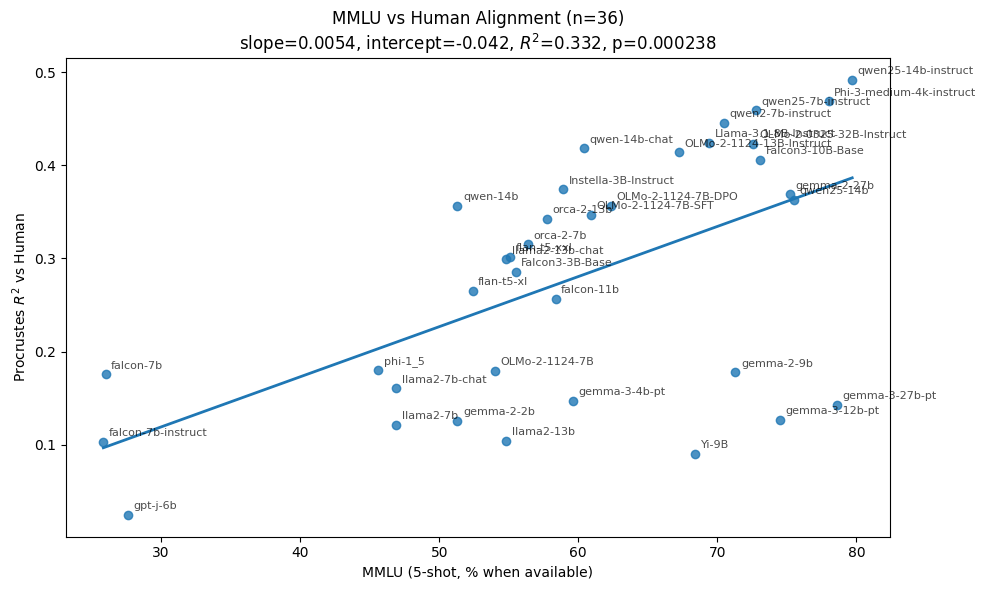

: 

: 

: 

In [ ]:
# --- Add MMLU scores (mostly 5-shot, from official cards/blogs; see notes below) ---
mmlu_map = {
    # Qwen / Qwen2 / Qwen2.5
    "model_triplet_output_qwen25-14b-instruct_THINGS_embedding": 63.69,   # Qwen2.5 14B Instruct
    "model_triplet_output_qwen25-7b-instruct_THINGS_embedding": 72.8,    # Qwen2.5 7B Instruct
    "model_triplet_output_qwen2-7b-instruct_THINGS_embedding": 70.5,     # Qwen2 7B Instruct
    "model_triplet_output_qwen25-14b_THINGS_embedding": 75.5,            # Qwen2.5 14B (base)
    "model_triplet_output_qwen-14b_THINGS_embedding": 51.3,              # Qwen 14B (base)
    "model_triplet_output_qwen-14b-chat_THINGS_embedding": 60.4,         # Qwen 14B Chat

    # Gemma 2 (PT numbers from model cards)
    "model_triplet_output_gemma-2-2b_THINGS_embedding": 51.3,
    "model_triplet_output_gemma-2-9b_THINGS_embedding": 71.3,
    "model_triplet_output_gemma-2-27b_THINGS_embedding": 75.2,

    # Gemma 3 (PT numbers from model cards)
    "model_triplet_output_gemma-3-4b-pt_THINGS_embedding": 59.6,
    "model_triplet_output_gemma-3-12b-pt_THINGS_embedding": 74.5,
    "model_triplet_output_gemma-3-27b-pt_THINGS_embedding": 78.6,
    # (no reliable published 5-shot MMLU for Gemma-3 *-it yet; leaving NaN)
    # (270M variants also typically not reported on MMLU; leave NaN)

    # Llama
    "model_triplet_output_Llama-3.1-8B-Instruct_THINGS_embedding": 69.4,  # Llama 3.1 8B Instruct
    "model_triplet_output_llama2-7b_THINGS_embedding": 46.9,              # Llama 2 7B
    "model_triplet_output_llama2-13b_THINGS_embedding": 54.8,             # Llama 2 13B
    "model_triplet_output_llama2-7b-chat_THINGS_embedding": 46.9,         # reuse 7B value when chat-only listed
    "model_triplet_output_llama2-13b-chat_THINGS_embedding": 54.8,        # reuse 13B value when chat-only listed

    # OLMo 2 (official blog/stat pages)
    "model_triplet_output_OLMo-2-1124-7B_THINGS_embedding": 53.98,        # 7B base
    "model_triplet_output_OLMo-2-1124-7B-SFT_THINGS_embedding": 60.92,    # 7B SFT
    "model_triplet_output_OLMo-2-1124-7B-DPO_THINGS_embedding": 62.36,    # 7B DPO
    "model_triplet_output_OLMo-2-1124-13B-Instruct_THINGS_embedding": 67.21,
    "model_triplet_output_OLMo-2-0325-32B-Instruct_THINGS_embedding": 72.59,
    # OLMo 2 1B / AMD-OLMo 1B not consistently reported on MMLU → leave NaN

    # Falcon (v1 & v3)
    "model_triplet_output_falcon-7b_THINGS_embedding": 26.0,              # Falcon-7B (older leaderboard/blog)
    "model_triplet_output_falcon-7b-instruct_THINGS_embedding": 25.84,    # Falcon-7B-Instruct
    "model_triplet_output_falcon-11b_THINGS_embedding": 58.37,            # Falcon-11B
    "model_triplet_output_Falcon3-3B-Base_THINGS_embedding": 55.5,        # Falcon3-3B Base
    "model_triplet_output_Falcon3-10B-Base_THINGS_embedding": 73.1,       # Falcon3-10B Base

    # Orca 2 (paper/cards)
    "model_triplet_output_orca-2-13b_THINGS_embedding": 57.73,
    "model_triplet_output_orca-2-7b_THINGS_embedding": 56.37,

    # Phi family
    "model_triplet_output_Phi-3-medium-4k-instruct_THINGS_embedding": 78.0,
    "model_triplet_output_phi-1_5_THINGS_embedding": 45.6,
    # (phi-3.5-mini, phi-3-mini-128k, phi-3-medium-128k, phi-4-mini-reasoning → no consistent 5-shot MMLU yet)

    # FLAN-T5 (from Scaling Instruction-Finetuned LMs; XL explicit; XXL from UL2 card table)
    "model_triplet_output_flan-t5-xl_THINGS_embedding": 52.4,
    "model_triplet_output_flan-t5-xxl_THINGS_embedding": 55.1,
    # (small/large not directly reported in sources above → leave NaN)

    # Yi, Eleuther
    "model_triplet_output_Yi-9B_THINGS_embedding": 68.4,
    "model_triplet_output_gpt-j-6b_THINGS_embedding": 27.6,

    # GPT-OSS (numbers vary widely by source/protocol; leaving blank to avoid mixing MMLU vs MMLU-Pro)
    # Instella (some press/model cards list MMLU; use if present)
    "model_triplet_output_Instella-3B-Instruct_THINGS_embedding": 58.90,
    # others (e.g., AMD-OLMo-1B, Instella-3B base/SFT, Mamba 1.4B, T5-3B/11B plain) → set if you obtain vetted values
}

# Merge into r2_df
r2_df["MMLU"] = r2_df["model"].map(mmlu_map).astype(float)

# How many mapped?
print("Mapped MMLU for", r2_df["MMLU"].notna().sum(), "of", len(r2_df), "models.")
print("Missing MMLU for:", sorted(r2_df.loc[r2_df["MMLU"].isna(), "model"].tolist()))

# --- Scatter: MMLU vs Procrustes R² (with line of best fit + stats) ---
sub = r2_df.dropna(subset=["MMLU", "r2"]).copy()

# Simple linear regression (numpy)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = sub["MMLU"].to_numpy()
y = sub["r2"].to_numpy()

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
x_line = np.linspace(x.min(), x.max(), 200)
y_line = intercept + slope * x_line

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.8)
plt.plot(x_line, y_line, linewidth=2)
for _, row in sub.iterrows():
    # faint labels; trim the long prefix to make readable
    lbl = row["model"].replace("model_triplet_output_", "").replace("_THINGS_embedding", "")
    plt.annotate(lbl, (row["MMLU"], row["r2"]), textcoords="offset points", xytext=(4,4), fontsize=8, alpha=0.7)

plt.xlabel("MMLU (5-shot, % when available)")
plt.ylabel("Procrustes $R^2$ vs Human")
plt.title(f"MMLU vs Human Alignment (n={len(sub)})\n"
          f"slope={slope:.4f}, intercept={intercept:.3f}, $R^2$={r_value**2:.3f}, p={p_value:.3g}")
plt.tight_layout()
plt.show()


Unknown FT kind: ['model_triplet_output_OLMo-2-1124-7B_THINGS_embedding', 'model_triplet_output_Yi-9B_THINGS_embedding', 'model_triplet_output_falcon-11b_THINGS_embedding', 'model_triplet_output_falcon-7b_THINGS_embedding', 'model_triplet_output_gemma-2-27b_THINGS_embedding', 'model_triplet_output_gemma-2-2b_THINGS_embedding', 'model_triplet_output_gemma-2-9b_THINGS_embedding', 'model_triplet_output_gemma-3-270m_THINGS_embedding', 'model_triplet_output_gpt-j-6b_THINGS_embedding', 'model_triplet_output_llama2-13b_THINGS_embedding', 'model_triplet_output_llama2-7b_THINGS_embedding', 'model_triplet_output_phi-1_5_THINGS_embedding', 'model_triplet_output_qwen-14b_THINGS_embedding', 'model_triplet_output_qwen2-7b_THINGS_embedding', 'model_triplet_output_qwen25-14b_THINGS_embedding', 'model_triplet_output_qwen25-7b_THINGS_embedding']
              sum_sq    df          F        PR(>F)
C(FT_KIND)  0.514089   3.0  15.275765  2.071405e-07
Residual    0.639424  57.0        NaN           NaN


/tmp/ipykernel_3698680/826163715.py:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=anova_df, x="FT_KIND", y="r2", ci=95, capsize=0.2, order=order, palette="viridis")
/tmp/ipykernel_3698680/826163715.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anova_df, x="FT_KIND", y="r2", ci=95, capsize=0.2, order=order, palette="viridis")


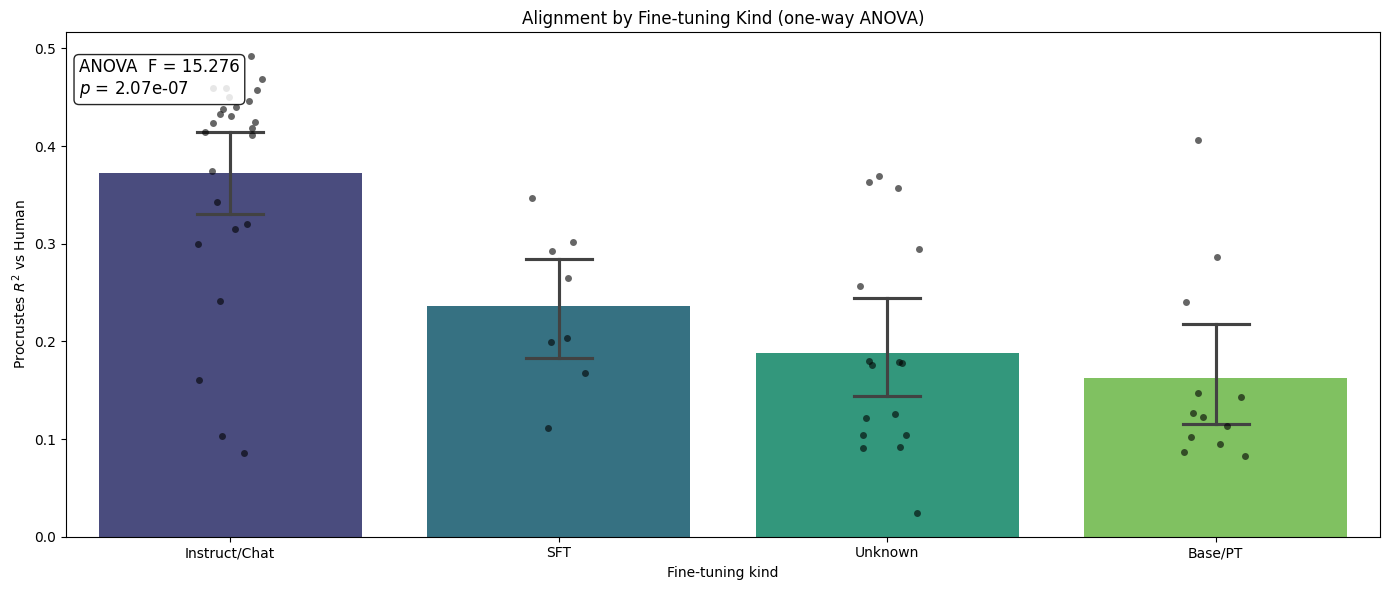

: 

: 

: 

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# --- Infer FT kind from model name ---
def infer_ft_kind(model_name: str) -> str:
    s = model_name.lower()

    # explicit combos
    if "sft-dpo" in s or "sft_dpo" in s:
        return "SFT+DPO"

    # explicit signals
    if "-dpo" in s or s.endswith("dpo") or "_dpo" in s:
        return "DPO"
    if "-sft" in s or s.endswith("sft") or "_sft" in s:
        return "SFT"
    if "instruct" in s or "chat" in s or re.search(r"-it(\b|[_-])", s):
        return "Instruct/Chat"
    if re.search(r"[-_]pt(\b|[_-])", s) or "base" in s:
        return "Base/PT"
    if "reasoning" in s:
        return "Reasoning"

    # family-specific heuristics
    if "orca-2" in s:
        return "Instruct/Chat"      # Orca-2 is an instruction-tuned Llama2
    if "flan-t5" in s:
        return "SFT"                 # FLAN is instruction-finetuned T5
    if "t5-3b" in s or "t5-11b" in s:
        return "Base/PT"             # plain T5 (non-FLAN) by default
    if "instella-3b" in s and "instruct" not in s and "sft" not in s:
        return "Base/PT"
    if "olmo-2-0425-1b" in s or "amd-olmo-1b" in s:
        return "Base/PT"
    if "gpt-oss-20b" in s:
        return "Base/PT"             # leave conservative
    if "mamba-1.4b" in s:
        return "Base/PT"

    return "Unknown"

# Add FT_KIND
r2_df["FT_KIND"] = r2_df["model"].apply(infer_ft_kind)

# Show any Unknowns so you can adjust rules if needed
unknowns = sorted(set(r2_df.loc[r2_df["FT_KIND"] == "Unknown", "model"]))
print("Unknown FT kind:", unknowns if unknowns else "None")

# --- One-way ANOVA: r2 ~ FT_KIND (drop groups with <2 points) ---
counts = r2_df.groupby("FT_KIND")["r2"].size()
valid_groups = counts[counts >= 2].index
anova_df = r2_df[r2_df["FT_KIND"].isin(valid_groups)].copy()

model = smf.ols("r2 ~ C(FT_KIND)", data=anova_df).fit()
anova_res = anova_lm(model, typ=2)
print(anova_res)

# --- Plot: group means ±95% CI + points ---
order = (
    anova_df.groupby("FT_KIND")["r2"]
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

plt.figure(figsize=(14, 6))
sns.barplot(data=anova_df, x="FT_KIND", y="r2", ci=95, capsize=0.2, order=order, palette="viridis")
sns.stripplot(data=anova_df, x="FT_KIND", y="r2", order=order, color="black", alpha=0.6, jitter=True)

F_val = anova_res.loc["C(FT_KIND)", "F"]
p_val = anova_res.loc["C(FT_KIND)", "PR(>F)"]
plt.xlabel("Fine-tuning kind")
plt.ylabel("Procrustes $R^2$ vs Human")
plt.title("Alignment by Fine-tuning Kind (one-way ANOVA)")
plt.text(
    0.01, 0.95,
    f"ANOVA  F = {F_val:.3f}\n$p$ = {p_val:.3g}",
    transform=plt.gca().transAxes,
    va="top",
    fontsize=12,
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.85)
)
plt.tight_layout()
plt.show()
